# **Topics in Business Analytics: Coursework 2**

##### Research Question: How does a comparative analysis on the demographic, characteristics, and experience of players influence wage distribution in major European football leagues?


### **The Analytical Approach** 

In [1234]:
#Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [1235]:
#Importing the Dataset 
football_salaries = pd.read_csv('SalaryPrediction.csv')

In [1236]:
#Removing commas (',') to analyse the data and makes sure to make all values are numeric within Wages
coloumn_to_convert = ["Wage"]
for i in coloumn_to_convert:
    football_salaries[i] = football_salaries[i].replace('[,]', '', regex=True)
    football_salaries[i] = pd.to_numeric(football_salaries[i], errors='coerce')

### Cleaning Data

In [1237]:
#Midfielder is spelt wrong. Need to change the name.

football_salaries ["Position"] = football_salaries ["Position"].replace ("Midfilder", "Midfielder")

football_salaries ["League"] = football_salaries ["League"].replace ("Primiera Liga", "Primeira Liga")

In [1238]:

football_salaries = football_salaries.reset_index(drop=True)

skewed_data= [0, 1, 2]
football_salaries = football_salaries.drop(skewed_data)

#### Modifying the dataset, grouping age groups and experience

In [1239]:
#Modifying the dataset by creating a new coloumn that organises the players into age group categories 
age = [
football_salaries ["Age"] <= 18,
    (football_salaries ["Age"] > 18) & (football_salaries ["Age"] <=21),
    (football_salaries ["Age"] > 21) & (football_salaries ["Age"] <=24),
    (football_salaries ["Age"] > 24) & (football_salaries ["Age"] <=27),
    (football_salaries ["Age"] > 27) & (football_salaries ["Age"] <=30),
    (football_salaries ["Age"] > 30) & (football_salaries ["Age"] <=33),
    football_salaries ["Age"] > 33
    ]
age_range = ["Under 18", "18-21", "21-24", "24-27", "27-30", "30-33", "Over 33"]
football_salaries["Age Range"] = np.select(age, age_range, default="")


#Adding Experience categories
experience = [
    football_salaries ["Apps"] + football_salaries["Caps"] <= 100,
    (football_salaries ["Apps"] + football_salaries["Caps"] > 100) & (football_salaries ["Apps"] + football_salaries["Caps"] <=200),
    (football_salaries ["Apps"] + football_salaries["Caps"] > 200) & (football_salaries ["Apps"] + football_salaries["Caps"] <=300),
    (football_salaries ["Apps"] + football_salaries["Caps"] > 300) & (football_salaries ["Apps"] + football_salaries["Caps"] <=400),
    (football_salaries ["Apps"] + football_salaries["Caps"] > 400) & (football_salaries ["Apps"] + football_salaries["Caps"] <=500),
    (football_salaries ["Apps"] + football_salaries["Caps"] > 500) & (football_salaries ["Apps"] + football_salaries["Caps"] <=600),
    football_salaries ["Apps"] + football_salaries["Caps"] > 600
]

experience_level = ["Under 100 Apps","100-200 Apps", "200-300 Apps", "300-400 Apps", "400-500 Apps", "500-600 Apps", "Over 600 Apps"]
football_salaries ["Experience level"] = np.select (experience, experience_level, default ="")

#Adding a continent category

continent = [
    football_salaries ["Nation"].isin (['BEL', 'ESP', 'AUT', 'ENG', 'FRA', 'NOR', 'GER', 'SVN', 'POL', 'CRO', 
    'NED', 'POR', 'ITA', 'SRB', 'DEN', 'SWE', 'SCO', 'TUR', 'BIH', 'UKR', 
    'SUI', 'CZE', 'SVK', 'NIR', 'IRL', 'MNE', 'KOS', 'FIN', 'GRE', 'ALB', 
    'HUN', 'ROU', 'MKD', 'LUX', 'BUL', 'ISL', 'LTU', 'LVA', 'EST', 'WAL', 'RUS', 'ARM', 'CYP', 'GEO']),
    football_salaries ["Nation"].isin (['EGY', 'SEN', 'ALG', 'CIV', 'GHA', 'MAR', 'GAB', 'CMR', 'MLI', 'NGA', 
    'COD', 'TUN', 'ZAM', 'GNB', 'MOZ', 'ZIM', 'GAM', 'EQG', 'ANG', 'RSA', 
    'BDI', 'CPV', 'BEN', 'GUF', 'LBY', 'COM', 'CGO', 'MAD', 'SLE', 'BFA', 'TOG', 'GUI']),
    football_salaries ["Nation"].isin (['BRA', 'ARG', 'URU', 'COL', 'CHI', 'PAR', 'ECU', 'PER', 'VEN', 'SUR', 'BOL', 'GUF']),
    football_salaries ["Nation"].isin (['USA', 'CAN', 'CRC', 'MEX', 'DOM', 'JAM', 'HON', 'PAN', 'MSR', 'CUW', 'BER', 'GLP', 'CTA']),
    football_salaries ["Nation"].isin (['KOR', 'JPN', 'ISR', 'IRN', 'UZB', 'IRQ', 'PLE', 'THA', 'CHN', 'SIN', 'PHI']),
    football_salaries ["Nation"].isin (['NZL', 'AUS']),
    football_salaries ["Nation"].isin (['GRN', 'GUY', 'GUF', 'CUW', 'GLP', 'BER', 'MSR'])
]

continents = ["Europe", "Africa", "South America", "North America", "Asia", "Oceania", "Caribbean and Other Territories"]

football_salaries ["Continents"] = np.select (continent, continents, default = "") 

football_salaries.tail()

,Wage,Age,Club,League,Nation,Position,Apps,Caps,Age Range,Experience level,Continents
3902,3400,19,Vigo,La Liga,ESP,Defender,0,0,18-21,Under 100 Apps,Europe
3903,3200,18,Famalicao,Primeira Liga,BRA,Goalkeeper,0,0,Under 18,Under 100 Apps,South America
3904,2900,18,Vigo,La Liga,ESP,Forward,0,0,Under 18,Under 100 Apps,Europe
3905,2700,18,Vigo,La Liga,ESP,Defender,0,0,Under 18,Under 100 Apps,Europe
3906,1400,18,Vigo,La Liga,ESP,Defender,0,0,Under 18,Under 100 Apps,Europe


#### Average Total Wage

In [1240]:
#Calculating the averages of wages

#Mean of Wage
mean_wage = round (football_salaries["Wage"].mean(), 0)
formatted_mean_wage = "€{:,}".format(mean_wage)
print ("Mean of the Total Yearly Wage: \n", formatted_mean_wage)
#Median of Wage
median_wage = round (football_salaries ["Wage"].median(), 0)
formatted_median_wage = "€{:,}".format(median_wage)
print ("Median of the Total Yearly Wage: \n", formatted_median_wage)
#Mode of Wage
mode_wage = round (football_salaries ["Wage"].mode()[0], 0)
formatted_mode_wage = "€{:,}".format(mode_wage)
print ("Mode of the Total Yearly Wage: \n", formatted_mode_wage)
#Standard Deviation
std_wage = round (football_salaries ["Wage"].std(), 0)
formatted_std_wage = "€{:,}".format(std_wage)
print ("Standard Deviation of the Total Yearly Wage:\n", formatted_std_wage)

#Finding the correlations
Correlation = football_salaries [["Age", "Wage", "Apps", "Caps"]]
Correlation_Data = Correlation.corr()
print ("\nCorrelation\n" , Correlation_Data)

Mean of the Total Yearly Wage: 
 €1,337,409.0
Median of the Total Yearly Wage: 
 €399,000.0
Mode of the Total Yearly Wage: 
 €29,000
Standard Deviation of the Total Yearly Wage:
 €2,340,737.0

Correlation
            Age      Wage      Apps      Caps
Age   1.000000  0.339588  0.926380  0.454376
Wage  0.339588  1.000000  0.443232  0.568709
Apps  0.926380  0.443232  1.000000  0.530137
Caps  0.454376  0.568709  0.530137  1.000000


#### Plotting Histogram and Boxplot for Yearly Wages

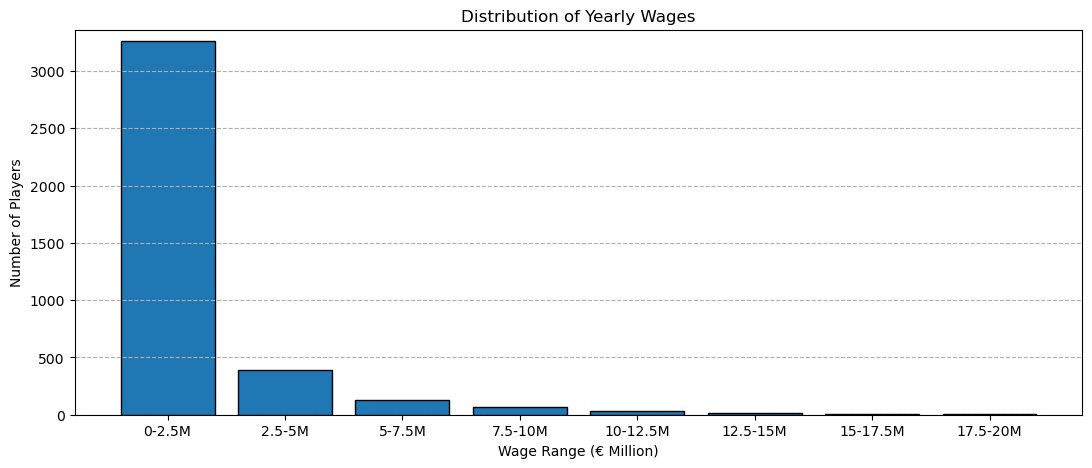

In [1241]:
# Plotting the Bar Graph 1

wage_millions = football_salaries ["Wage"]/1_000_000

bins = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]  # Define wage ranges up to 20 million
labels = ['0-2.5M','2.5-5M','5-7.5M','7.5-10M','10-12.5M','12.5-15M','15-17.5M', '17.5-20M' ]

# Create a new column with wage ranges
wage_groups = pd.cut(wage_millions, bins=bins, labels=labels, right=False)

# Count the number of players in each wage range
wage_distribution = wage_groups.value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(13, 5))
plt.bar(wage_distribution.index, wage_distribution.values, edgecolor='black')
plt.title("Distribution of Yearly Wages")
plt.xlabel("Wage Range (€ Million)")
plt.ylabel("Number of Players")
plt.ylim(0, max(wage_distribution.values) + 100)  # Adjust the y-axis limit based on max value
plt.grid(axis='y', linestyle='dashed')
plt.show()



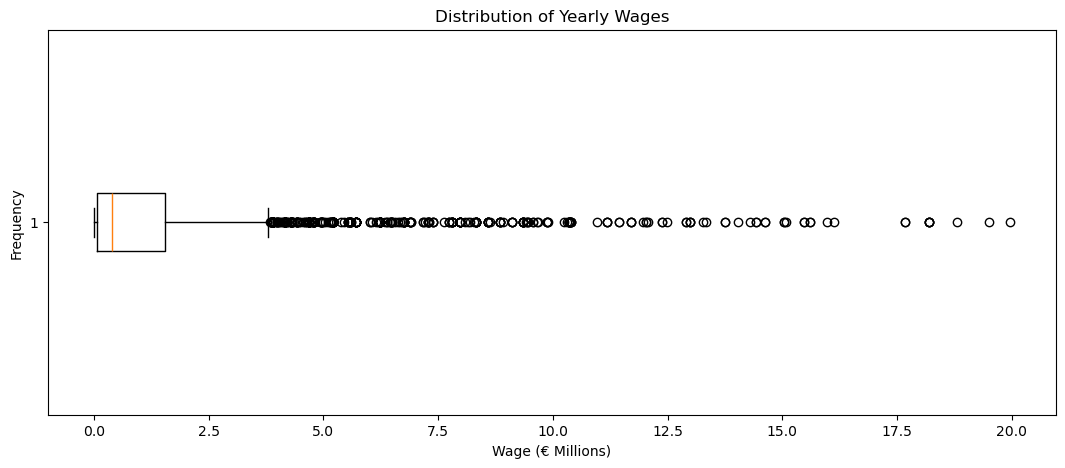

In [1242]:
#Plotting Box Plot

plt.figure (figsize = (13,5))
plt.boxplot(wage_millions, vert = False) #Making the box plot be horizontal rather than vertical
plt.title ("Distribution of Yearly Wages")
plt.xlabel("Wage (€ Millions)")
plt.ylabel("Frequency")
plt.show()


## Descriptive Analysis of Wage by Demographic Factors

### Finding the Mean value of Wage dependent on Age Range, Nation, Position, Club, League, and Experience

#### Age Range

In [1244]:
#Mean Value
age_salaries_mean = football_salaries.groupby("Age Range")["Wage"].mean().sort_values(ascending=False) #Grouping Age group and Wage together and Finding the mean and making sure it decsends in order
age_salaries_mean_currency = age_salaries_mean.astype (int).map ("€{:,}".format) #Making the numbers as an integer, giving the euro sign
print ('\033[4m' "The Mean Value of the Yearly Wage within Age Ranges:\n" '\033[0m', age_salaries_mean_currency) 

#Median Value
age_salaries_median = football_salaries.groupby("Age Range")["Wage"].median().sort_values(ascending=False)
age_salaries_median_currency = age_salaries_median.astype (int).map ("€{:,}".format)
print ('\033[4m' "\nThe Median Value of the Yearly Wage within Age Ranges:\n" '\033[0m', age_salaries_median_currency) 



The Mean Value of the Yearly Wage within Age Ranges:
 Age Range
27-30       €2,420,708
30-33       €2,406,013
Over 33     €2,170,362
24-27       €1,927,534
21-24       €1,346,996
18-21         €470,243
Under 18      €100,164
Name: Wage, dtype: object

The Median Value of the Yearly Wage within Age Ranges:
 Age Range
30-33       €1,276,000
27-30       €1,256,000
Over 33     €1,077,000
24-27         €957,000
21-24         €604,000
18-21          €89,500
Under 18       €29,000
Name: Wage, dtype: object


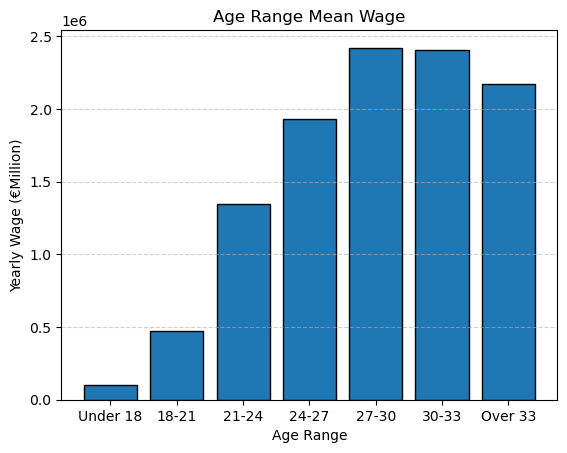

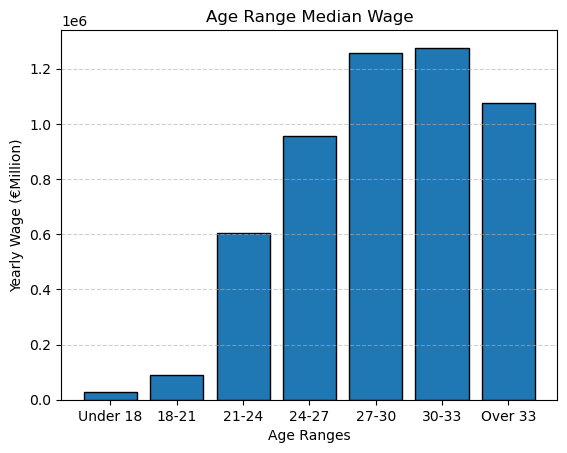

In [1245]:
#Visualisation
## Age Group Mean Wage

age_range_graph = ["Under 18", "18-21", "21-24", "24-27", "27-30", "30-33", "Over 33"]

age_salaries_mean = age_salaries_mean.reindex(age_range_graph) #Alligning the salaries with the Age Group
plt.bar (age_range_graph, age_salaries_mean, edgecolor = 'black')
plt.title ("Age Range Mean Wage")
plt.xlabel ("Age Range")
plt.ylabel ("Yearly Wage (€Million)")
plt.grid(axis = 'y', linestyle = 'dashed', alpha = 0.6)
plt.show()

## Age Group Median Wage

age_salaries_median = age_salaries_median.reindex(age_range_graph) #Alligning the salaries with the Age Group
plt.bar (age_range_graph, age_salaries_median, edgecolor = 'black')
plt.title ("Age Range Median Wage")
plt.xlabel ("Age Ranges")
plt.ylabel ("Yearly Wage (€Million)")
plt.grid(axis = 'y', linestyle = 'dashed', alpha = 0.6)

#Box Plot of Age Group Wages
## Under 21






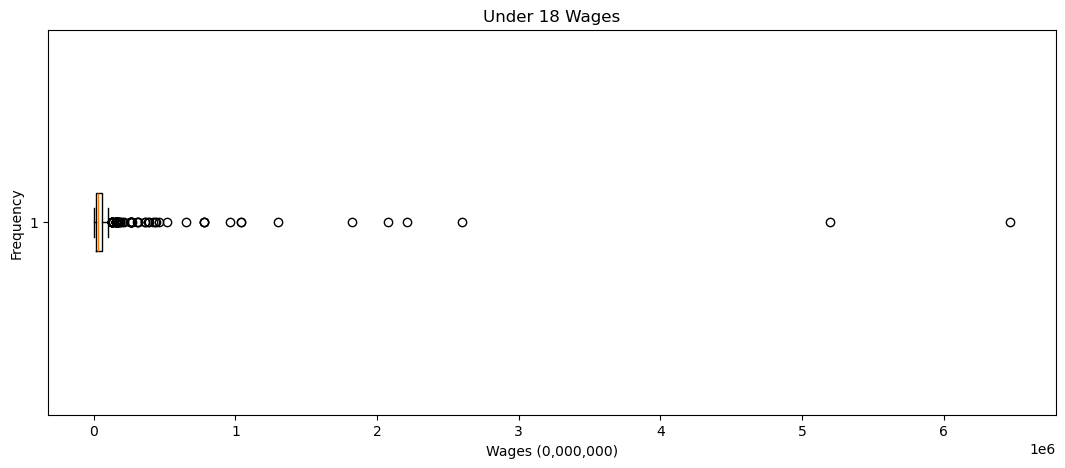

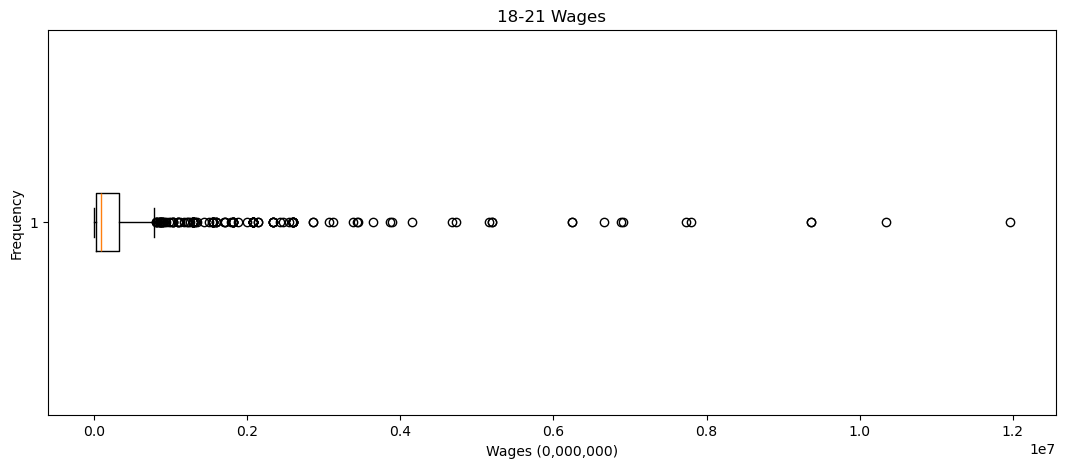

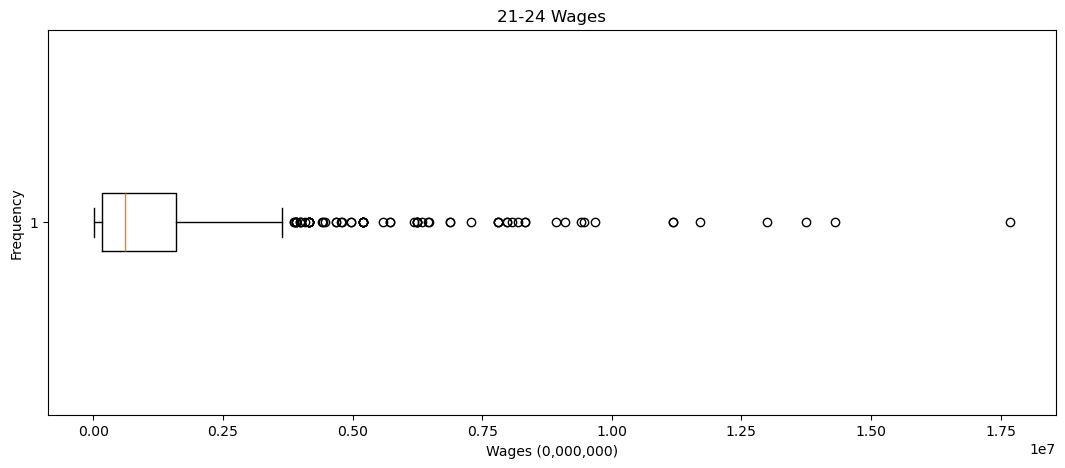

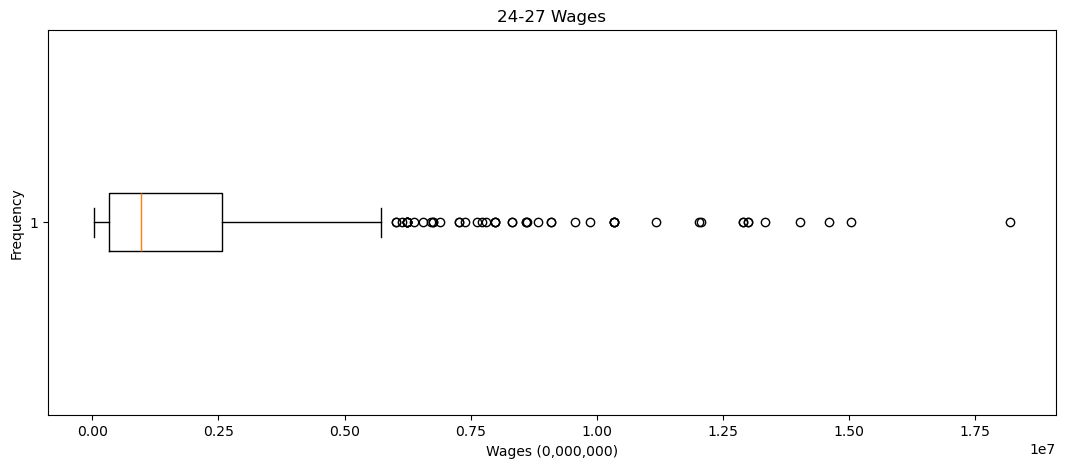

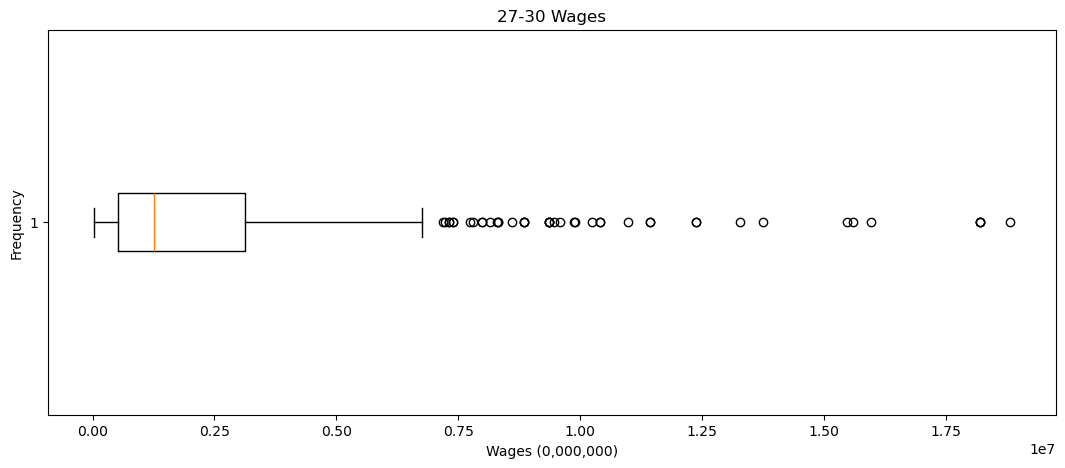

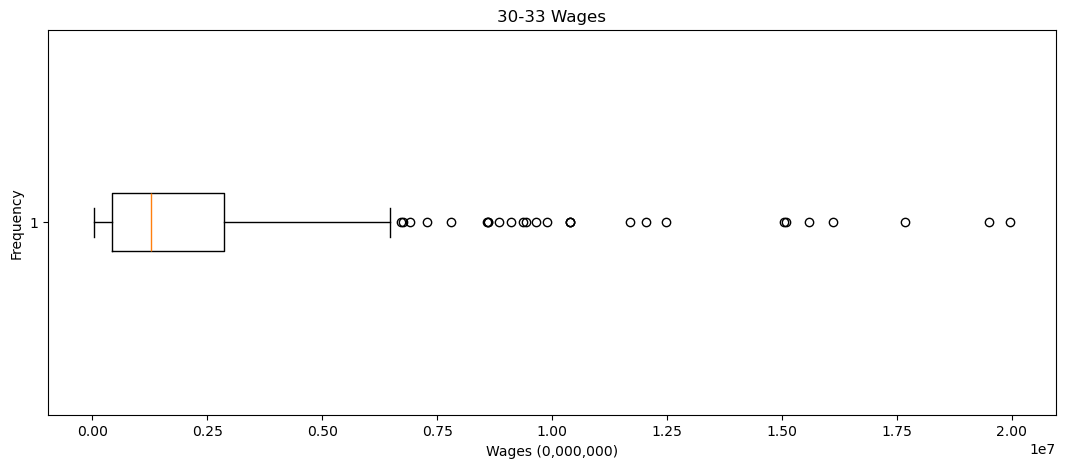

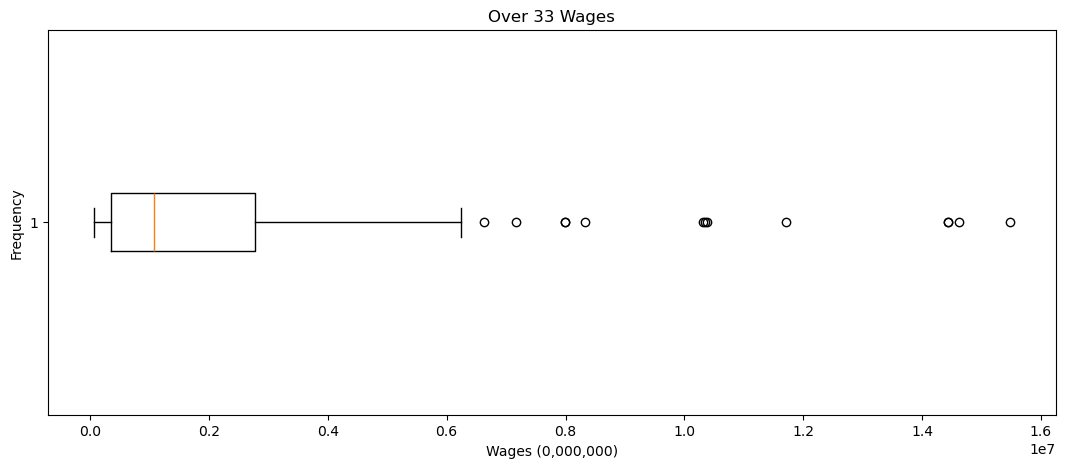

In [1246]:
#Box Plot of Age Group Wages

## Under 18
under_18_wage = football_salaries[football_salaries ["Age Range"] == "Under 18"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(under_18_wage,vert = False)
plt.title ("Under 18 Wages")
plt.xlabel("Wages (0,000,000)")
plt.ylabel("Frequency")
plt.show()

## 18-21
a_18_21_wage = football_salaries[football_salaries ["Age Range"] == "18-21"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(a_18_21_wage,vert = False)
plt.title ("18-21 Wages")
plt.xlabel("Wages (0,000,000)")
plt.ylabel("Frequency")
plt.show()

## 21-24
a_21_24_wage = football_salaries[football_salaries ["Age Range"] == "21-24"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(a_21_24_wage,vert = False)
plt.title ("21-24 Wages")
plt.xlabel("Wages (0,000,000)")
plt.ylabel("Frequency")
plt.show()

## 24-27
a_24_27_wage = football_salaries[football_salaries ["Age Range"] == "24-27"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(a_24_27_wage,vert = False)
plt.title ("24-27 Wages")
plt.xlabel("Wages (0,000,000)")
plt.ylabel("Frequency")
plt.show()

## 27-30
a_27_30_wage = football_salaries[football_salaries ["Age Range"] == "27-30"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(a_27_30_wage,vert = False)
plt.title ("27-30 Wages")
plt.xlabel("Wages (0,000,000)")
plt.ylabel("Frequency")
plt.show()

#30-33
a_30_33_wage = football_salaries[football_salaries ["Age Range"] == "30-33"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(a_30_33_wage,vert = False)
plt.title ("30-33 Wages")
plt.xlabel("Wages (0,000,000)")
plt.ylabel("Frequency")
plt.show()

#Over 33

over_33_wage = football_salaries[football_salaries ["Age Range"] == "Over 33"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(over_33_wage,vert = False)
plt.title ("Over 33 Wages")
plt.xlabel("Wages (0,000,000)")
plt.ylabel("Frequency")
plt.show()


Dicussing how wage changes across 

#### Nationality

In [1247]:
#Filtering Nationalities that dont occur at least 10 times.
nation_numbers = football_salaries ['Nation'].value_counts()
verified_nations = nation_numbers[nation_numbers >= 30].index
verified_nations_10 = nation_numbers[nation_numbers >=10].index

In [1248]:
#Mean Value for Nationality
nation_salaries_mean = football_salaries [football_salaries ["Nation"].isin(verified_nations)].groupby("Nation")["Wage"].mean().sort_values(ascending=False)
nation_salaries_mean_currency = nation_salaries_mean.astype(int).map("€{:,}".format)

#Revealing the top 3 and bottom 3 mean values
top_nation_salaries_mean_currency = nation_salaries_mean_currency.head(3)
bottom_nation_salaries_mean_currency = nation_salaries_mean_currency.tail (3)
print ('\033[4m'"The Mean Value of the Yearly Wage of the Top 3 Nations:\n" '\033[0m', top_nation_salaries_mean_currency, "\n", '\033[4m'"\nThe Mean Value of the Yearly Wage of the Bottom 3 Nations:\n"'\033[0m', bottom_nation_salaries_mean_currency)

#Median Value for Nationality
nation_salaries_median = football_salaries [football_salaries ["Nation"].isin(verified_nations)].groupby("Nation")["Wage"].median().sort_values(ascending=False)
nation_salaries_median_currency = nation_salaries_median.astype(int).map("€{:,}".format)

#Revealing the top 3 and bottom 3 median values
top_nation_salaries_median_currency = nation_salaries_median_currency.head(3)
bottom_nation_salaries_median_currency = nation_salaries_median_currency.tail (3)
print ('\033[4m'"\nThe Median Value of the Yearly Wage of the Top 3 Nations:\n" '\033[0m', top_nation_salaries_median_currency, "\n", '\033[4m'"\nThe Median Value of the Yearly Wage of the Bottom 3 Nations:\n"'\033[0m', bottom_nation_salaries_median_currency)



The Mean Value of the Yearly Wage of the Top 3 Nations:
 Nation
BEL    €3,438,130
CRO    €2,283,642
ARG    €2,111,379
Name: Wage, dtype: object 
 
The Mean Value of the Yearly Wage of the Bottom 3 Nations:
 Nation
JPN    €707,000
IRL    €642,472
POR    €532,720
Name: Wage, dtype: object

The Median Value of the Yearly Wage of the Top 3 Nations:
 Nation
BEL    €1,555,000
CRO    €1,336,500
ARG    €1,300,000
Name: Wage, dtype: object 
 
The Median Value of the Yearly Wage of the Bottom 3 Nations:
 Nation
ENG    €156,000
IRL    €104,000
POR     €67,000
Name: Wage, dtype: object


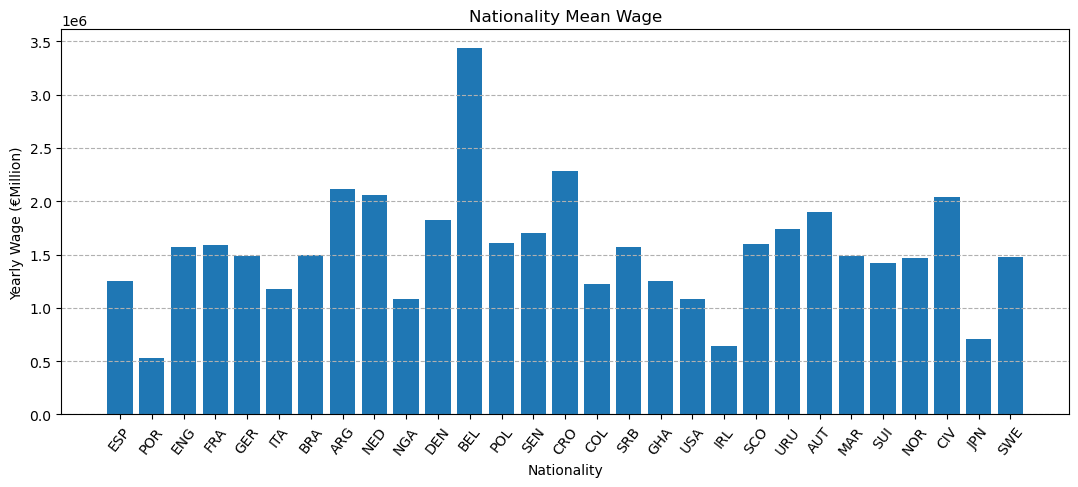

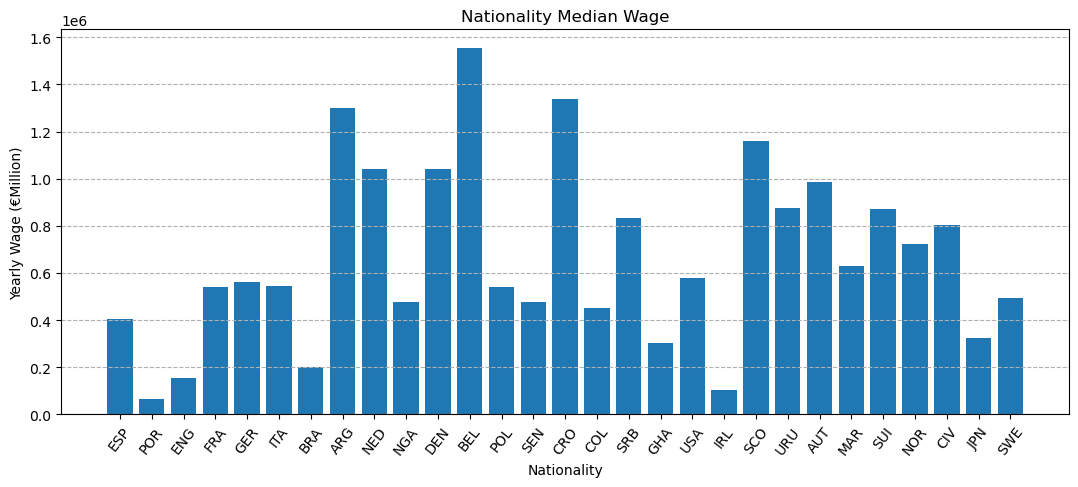

In [1249]:
#Visualisation

#Creating the Bar Graph for Nationality Mean Wage
plt.figure (figsize = (13,5))
nation_salaries_mean = nation_salaries_mean.reindex(verified_nations) #Alligning the salaries with the Age Group
plt.bar (verified_nations, nation_salaries_mean)
plt.title ("Nationality Mean Wage")
plt.xlabel ("Nationality")
plt.ylabel ("Yearly Wage (€Million)")
plt.xticks (rotation =52)
plt.grid(axis = 'y', linestyle = 'dashed')
plt.show()

#Creating the Bar Graph for Nationality Median Wage
plt.figure (figsize = (13,5))
nation_salaries_median = nation_salaries_median.reindex(verified_nations) #Alligning the salaries with the Age Group
plt.bar (verified_nations, nation_salaries_median)
plt.title ("Nationality Median Wage")
plt.xlabel ("Nationality")
plt.ylabel ("Yearly Wage (€Million)")
plt.xticks (rotation =52)
plt.grid(axis = 'y', linestyle = 'dashed')
plt.show()

In [1250]:
#Continent Analysis

# Mean Value for Continents
continent_salaries_mean = football_salaries.groupby("Continents")["Wage"].mean().sort_values(ascending=False)
continent_salaries_mean_currency = continent_salaries_mean.astype(int).map("€{:,}".format)

print('\033[4m' + "The Mean Value of the Yearly Wage within Continents:\n" + '\033[0m', continent_salaries_mean_currency)

# Median Value for Continents
continent_salaries_median = football_salaries.groupby("Continents")["Wage"].median().sort_values(ascending=False)
continent_salaries_median_currency = continent_salaries_median.astype(int).map("€{:,}".format)

print('\033[4m' + "The Median Value of the Yearly Wage within Continents:\n" + '\033[0m', continent_salaries_median_currency)



The Mean Value of the Yearly Wage within Continents:
 Continents
South America                      €1,549,151
Europe                             €1,331,211
North America                      €1,291,682
Africa                             €1,221,645
Asia                                 €986,222
Oceania                              €926,666
Caribbean and Other Territories      €780,000
Name: Wage, dtype: object
The Median Value of the Yearly Wage within Continents:
 Continents
Caribbean and Other Territories    €780,000
South America                      €508,000
North America                      €448,000
Europe                             €388,000
Africa                             €375,000
Asia                               €364,500
Oceania                            €174,000
Name: Wage, dtype: object


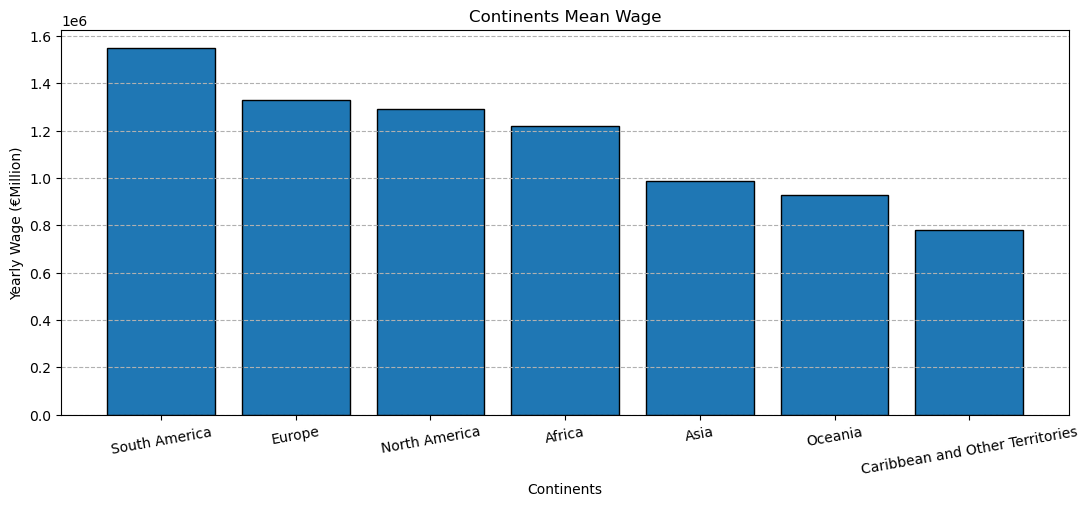

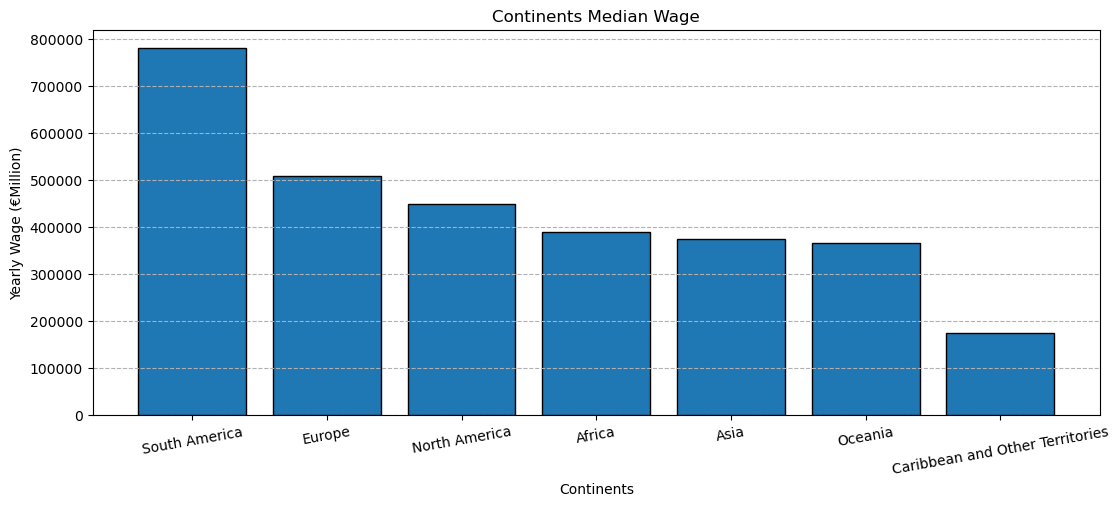

In [1471]:
#Creating the Bar Graph for Continent Mean Wage
continents = ['South America', 'Europe', 'North America', 'Africa', 'Asia', 'Oceania', 'Caribbean and Other Territories']

plt.figure (figsize = (13,5))
plt.bar (continents, continent_salaries_mean, edgecolor = 'black')
plt.title ("Continents Mean Wage")
plt.xlabel ("Continents")
plt.ylabel ("Yearly Wage (€Million)")
plt.xticks (rotation =10)
plt.grid(axis = 'y', linestyle = 'dashed')
plt.show()

#Creating the Bar Graph for Continent Median Wage
plt.figure (figsize = (13,5))
plt.bar (continents, continent_salaries_median, edgecolor = 'black')
plt.title ("Continents Median Wage")
plt.xlabel ("Continents")
plt.ylabel ("Yearly Wage (€Million)")
plt.xticks (rotation =10)
plt.grid(axis = 'y', linestyle = 'dashed')
plt.show()

Discussion: Compare the similairities and Contrasting features of the 2 graphs of Mean and Median. Explore possible reasons for the contrast. Could this be because of international reputation? Quality of output? 

#### Position

In [1252]:
#Mean value for Position
position_salaries_mean = football_salaries.groupby("Position")["Wage"].mean().sort_values(ascending=False)
position_salaries_mean_currency = position_salaries_mean.astype (int).map ("€{:,}".format)

#Median value
position_salaries_median = football_salaries.groupby("Position")["Wage"].median().sort_values(ascending=False)
position_salaries_median_currency = position_salaries_median.astype (int).map ("€{:,}".format)

#Tabling the Data
position_combined = pd.concat ([position_salaries_mean_currency, position_salaries_median_currency], axis = 1)
position_combined.columns = ['Mean Wage', 'Median Wage']
display(position_combined)

,Mean Wage,Median Wage
Position,,
Midfielder,"€1,568,861","€523,000"
Defender,"€1,299,439","€440,000"
Forward,"€1,247,492","€272,000"
Goalkeeper,"€1,017,645","€227,500"


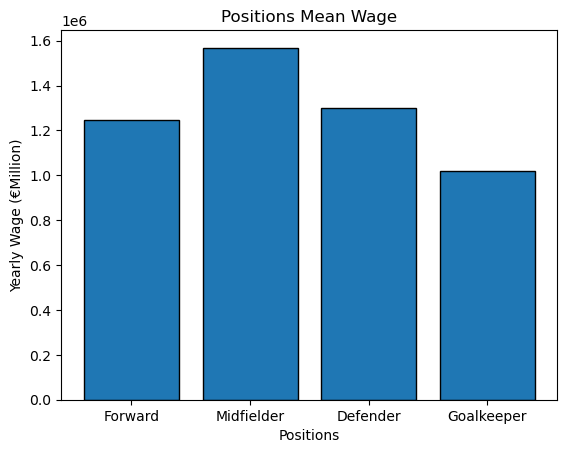

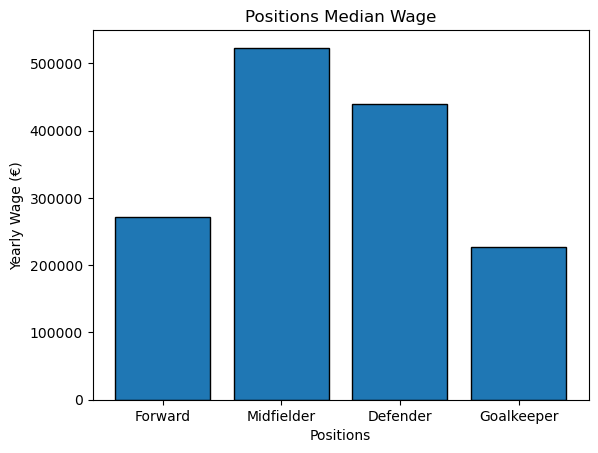

In [1473]:
#Bar Chart or Box Plot of the distribution of wage

positions = ["Forward", "Midfielder", "Defender", "Goalkeeper"]

#Mean
position_salaries_mean = position_salaries_mean.reindex(positions) #Alligning the salaries with the Age Group
plt.bar(positions, position_salaries_mean, edgecolor = 'black')
plt.title ("Positions Mean Wage")
plt.xlabel ("Positions")
plt.ylabel ("Yearly Wage (€Million)")
plt.show()

#Median
position_salaries_median = position_salaries_median.reindex(positions) #Alligning the salaries with the Age Group
plt.bar(positions, position_salaries_median, edgecolor = 'black')
plt.title ("Positions Median Wage")
plt.xlabel ("Positions")
plt.ylabel ("Yearly Wage (€)")
plt.show()

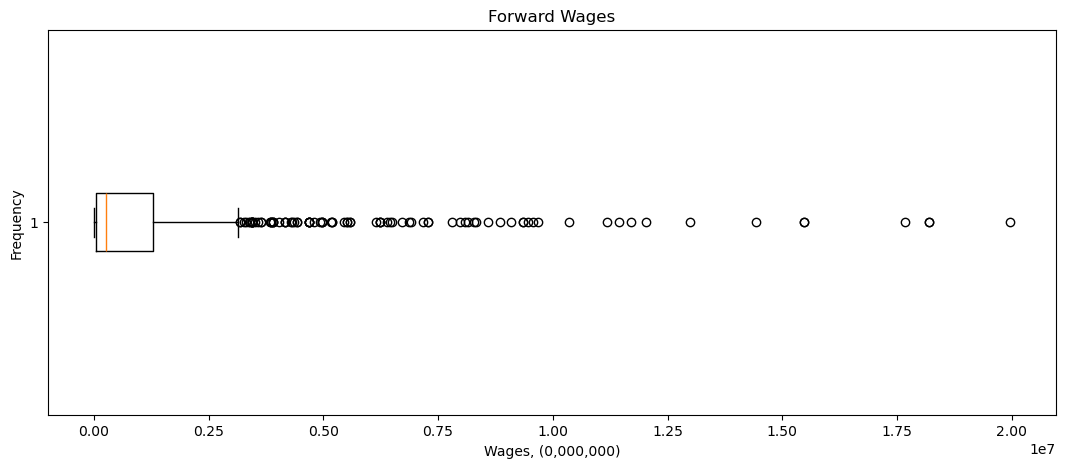

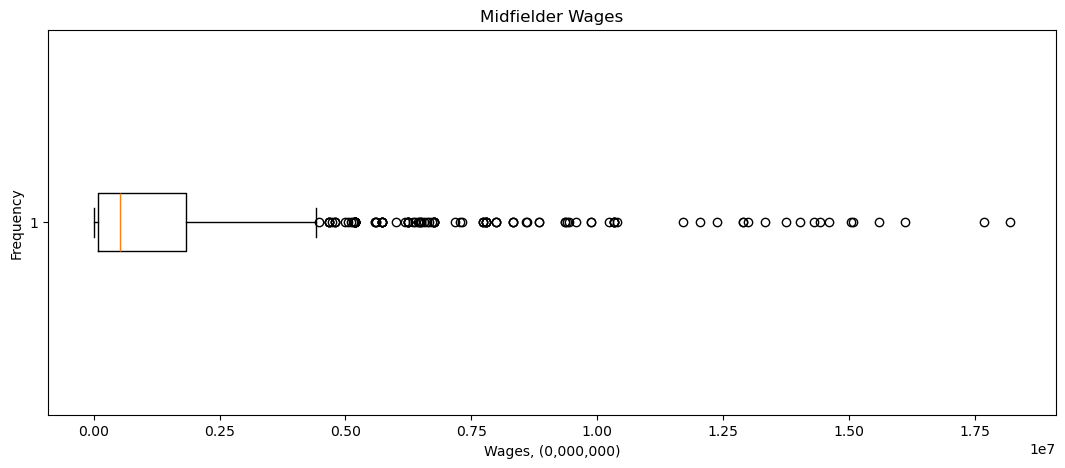

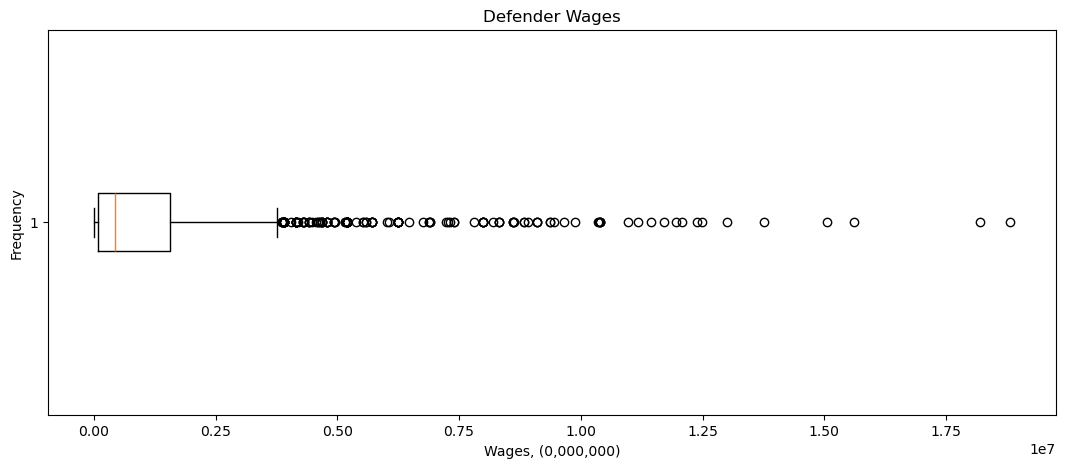

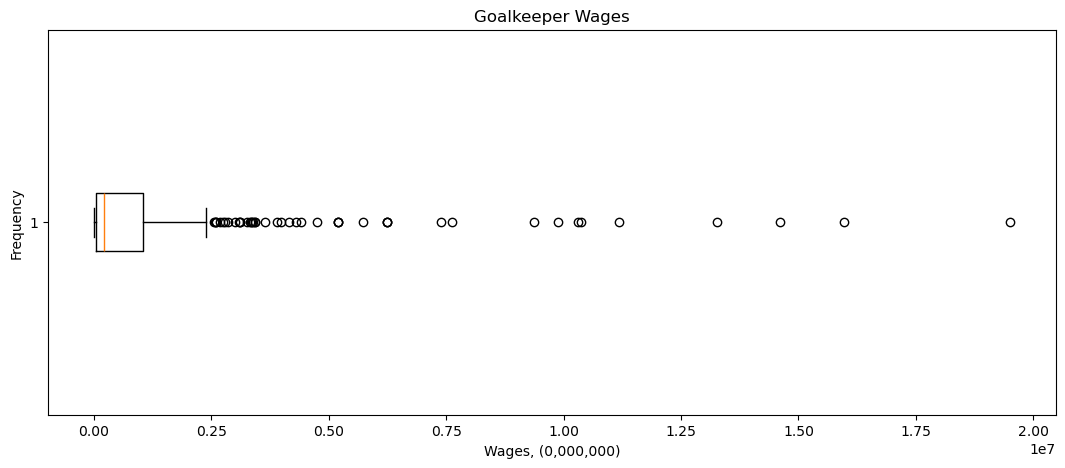

In [1254]:
#Box Plots

#Forwards
Forward_wage = football_salaries[football_salaries ["Position"] == "Forward"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(Forward_wage,vert = False)
plt.title ("Forward Wages")
plt.xlabel("Wages, (0,000,000)")
plt.ylabel("Frequency")
plt.show()

#Midfielders
Midfielder_wage = football_salaries[football_salaries ["Position"] == "Midfielder"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(Midfielder_wage,vert = False)
plt.title ("Midfielder Wages")
plt.xlabel("Wages, (0,000,000)")
plt.ylabel("Frequency")
plt.show()

#Defenders
Defender_wage = football_salaries[football_salaries ["Position"] == "Defender"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(Defender_wage,vert = False)
plt.title ("Defender Wages")
plt.xlabel("Wages, (0,000,000)")
plt.ylabel("Frequency")
plt.show() 

#Goalkeepers
Goalkeeper_wage = football_salaries[football_salaries ["Position"] == "Goalkeeper"]["Wage"]
plt.figure (figsize = (13,5))
plt.boxplot(Goalkeeper_wage,vert = False)
plt.title ("Goalkeeper Wages")
plt.xlabel("Wages, (0,000,000)")
plt.ylabel("Frequency")
plt.show()



Discussion focuses on whether positions are factors of wages decision ma

#### League & Club

In [1255]:
#Mean value for Club
club_salaries_mean = football_salaries.groupby(["Club"])["Wage"].mean().sort_values(ascending=False)
club_salaries_mean_currency = club_salaries_mean.astype (int).map ("€{:,}".format)
top_club_salaries_mean = club_salaries_mean.head(10)
top_club_salaries_mean_currency = top_club_salaries_mean.astype (int).map ("€{:,}".format)
bottom_club_salaries_mean = club_salaries_mean_currency.tail (5)
print ('\033[4m'"The Mean Value of the Top 30 Yearly Wage per Club:\n"'\033[0m', top_club_salaries_mean_currency, "\n", '\033[4m'"\nThe Mean Value of the Bottom 5 Yearly Wage per Club:\n"'\033[0m', bottom_club_salaries_mean)
print ("     ")

#Median Value
club_salaries_median = football_salaries.groupby(["Club"])["Wage"].median().sort_values(ascending=False)
club_salaries_median_currency = club_salaries_median.astype (int).map ("€{:,}".format)
top_club_salaries_median = club_salaries_median.head(30)
top_club_salaries_median_currency = top_club_salaries_median.astype (int).map ("€{:,}".format)
bottom_club_salaries_median = club_salaries_median_currency.tail (5)
print ('\033[4m'"The Median Value of the Top 30 Yearly Wage per Club:\n"'\033[0m', top_club_salaries_median_currency, "\n", '\033[4m'"\nThe Median Value of the Bottom 5 Yearly Wage per Club:\n"'\033[0m', bottom_club_salaries_median)
print ("     ")



The Mean Value of the Top 30 Yearly Wage per Club:
 Club
R. Madrid            €9,128,782
FC Bayern            €8,708,043
Barcelona            €6,313,604
PSG                  €5,738,852
Man UFC              €4,622,173
Man City             €4,526,184
Chelsea              €4,246,629
Juventus             €4,120,171
A. Madrid            €4,096,264
Borussia Dortmund    €3,907,576
Name: Wage, dtype: object 
 
The Mean Value of the Bottom 5 Yearly Wage per Club:
 Club
Rio Ave        €68,371
PTM            €65,811
MRT            €61,945
Gil Vicente    €55,769
VIZ            €47,267
Name: Wage, dtype: object
     
The Median Value of the Top 30 Yearly Wage per Club:
 Club
FC Bayern              €9,457,000
R. Madrid              €7,984,000
Barcelona              €6,931,500
PSG                    €4,091,000
A. Madrid              €3,884,500
Borussia Dortmund      €3,438,000
Juventus               €2,683,500
Inter                  €2,659,500
West Ham               €2,600,000
Chelsea                

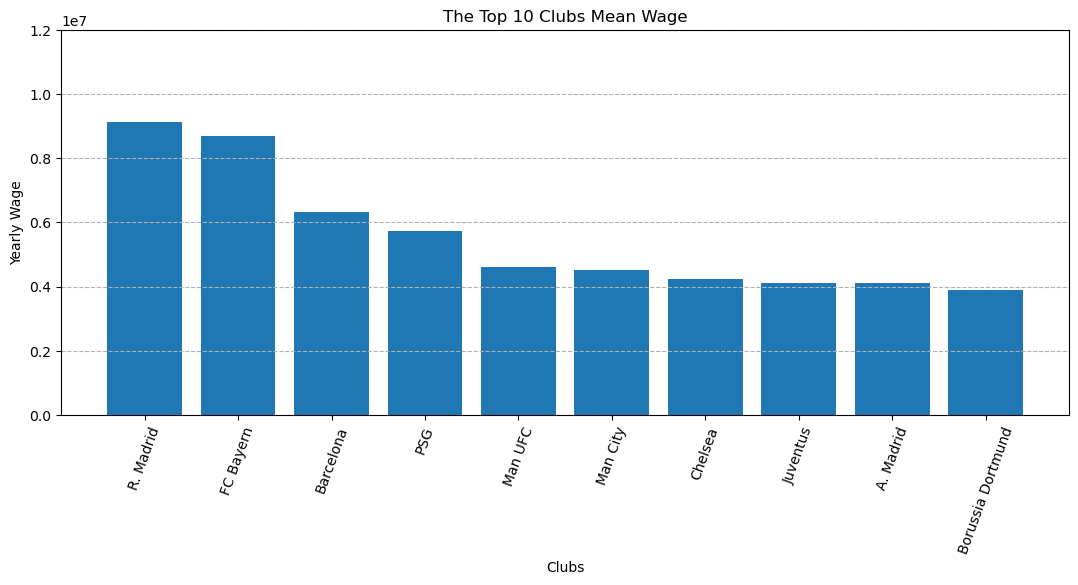

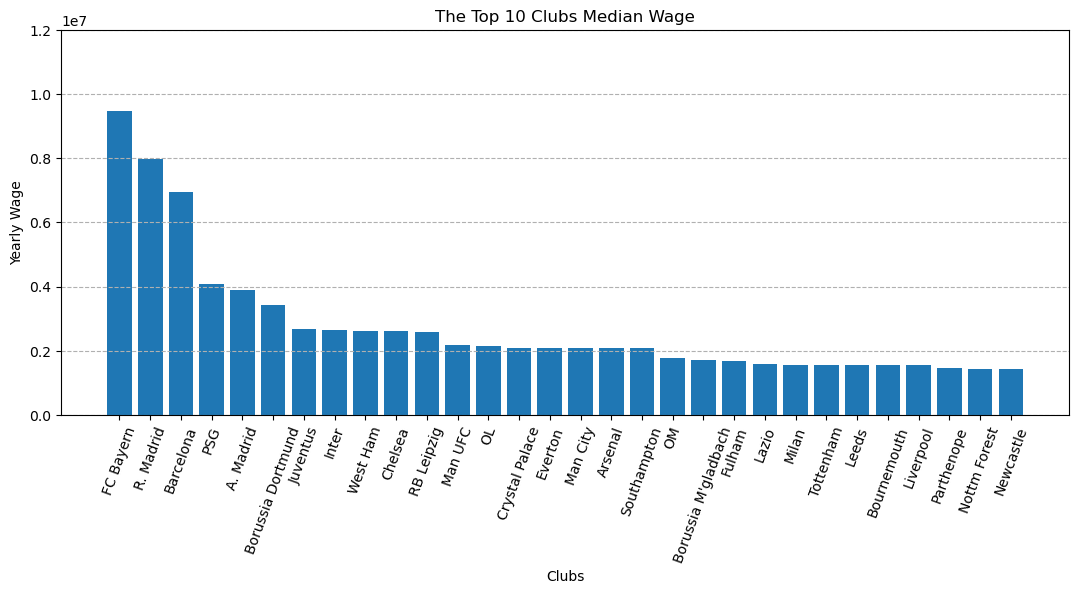

In [1477]:
# Bar Chart showing average wage by club 

#Mean
plt.figure (figsize = (13,5))
plt.bar(top_club_salaries_mean.index, top_club_salaries_mean.values)
plt.title ("The Top 10 Clubs Mean Wage")
plt.xlabel ("Clubs")
plt.ylabel ("Yearly Wage (Tenth Million")
plt.ylim(0, 12000000)
plt.xticks(rotation=70)
plt.grid (axis = 'y', linestyle = 'dashed')
plt.show()

#Median
plt.figure (figsize = (13,5))
plt.bar(top_club_salaries_median.index, top_club_salaries_median.values)
plt.title ("The Top 10 Clubs Median Wage")
plt.xlabel ("Clubs")
plt.ylabel ("Yearly Wage (tenth Million")
plt.ylim(0, 12000000)
plt.xticks(rotation=70)
plt.grid (axis = 'y', linestyle = 'dashed')
plt.show()



In [1257]:
#Mean value for League
league_salaries_mean = football_salaries.groupby("League")["Wage"].mean().sort_values(ascending=False)
league_salaries_mean_currency = league_salaries_mean.astype (int).map ("€{:,}".format)

#Median value for League
league_salaries_median = football_salaries.groupby("League")["Wage"].median().sort_values(ascending=False)
league_salaries_median_currency = league_salaries_median.astype (int).map ("€{:,}".format)

#Tabling it
league_combined = pd.concat ([league_salaries_mean_currency, league_salaries_median_currency], axis = 1)
league_combined.columns = ['Mean Wage', 'Median Wage']
display(league_combined)

,Mean Wage,Median Wage
League,,
Premier League,"€2,335,982","€1,560,000"
La Liga,"€1,520,234","€509,000"
Bundesliga,"€1,405,219","€672,000"
Serie A,"€1,336,126","€713,000"
Ligue 1 Uber Eats,"€977,859","€441,000"
Primeira Liga,"€194,826","€74,000"


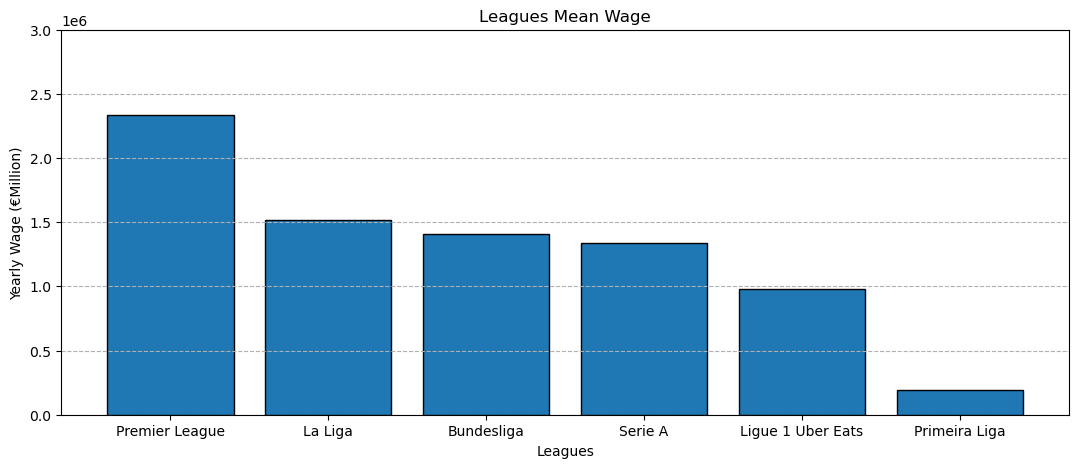

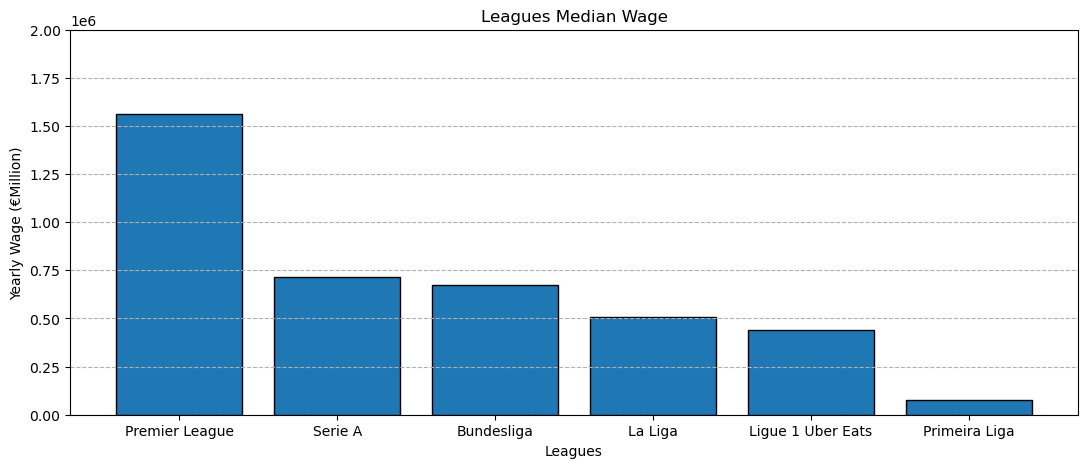

In [1479]:
# Bar chart showing avergae wage of the Leagues

#Mean
plt.figure (figsize = (13,5))
plt.bar(league_salaries_mean.index, league_salaries_mean.values, edgecolor = 'black')
plt.title ("Leagues Mean Wage")
plt.xlabel ("Leagues")
plt.ylabel ("Yearly Wage (€Million)")
plt.ylim(0, 3000000)

plt.grid (axis = 'y', linestyle = 'dashed')
plt.show()

#Median
plt.figure (figsize = (13,5))
plt.bar(league_salaries_median.index, league_salaries_median.values, edgecolor = 'black')
plt.title ("Leagues Median Wage")
plt.xlabel ("Leagues")
plt.ylabel ("Yearly Wage (€Million)")
plt.ylim(0, 2000000)
plt.grid (axis = 'y', linestyle = 'dashed')
plt.show()


#### Experience level

In [1500]:
experience_order = ["Under 100 Apps", "100-200 Apps", "200-300 Apps", "300-400 Apps", 
                    "400-500 Apps", "500-600 Apps", "Over 600 Apps"]

# Making it so the "Experience level" is ordered
football_salaries["Experience level"] = pd.Categorical(football_salaries["Experience level"], categories=experience_order,ordered = True)

#Calculate average wage for each experience level
xp_salaries_mean = football_salaries.groupby("Experience level", observed = True)["Wage"].mean()
xp_salaries_mean_currency = xp_salaries_mean.astype (int).map ("€{:,}".format)

#Median Value
xp_salaries_median = football_salaries.groupby("Experience level", observed = True)["Wage"].median()
xp_salaries_median_currency = xp_salaries_median.astype (int).map ("€{:,}".format)

#Grouping the data together
xp_combined = pd.concat([xp_salaries_mean_currency, xp_salaries_median_currency], axis=1)
xp_combined.columns = ['Mean Wage', 'Median Wage']
display(xp_combined)

,Mean Wage,Median Wage
Experience level,,
Under 100 Apps,"€352,586","€68,500"
100-200 Apps,"€1,474,224","€729,000"
200-300 Apps,"€2,080,246","€1,162,000"
300-400 Apps,"€2,595,064","€1,584,500"
400-500 Apps,"€3,683,489","€2,080,000"
500-600 Apps,"€5,550,660","€3,530,500"
Over 600 Apps,"€5,071,310","€3,362,000"


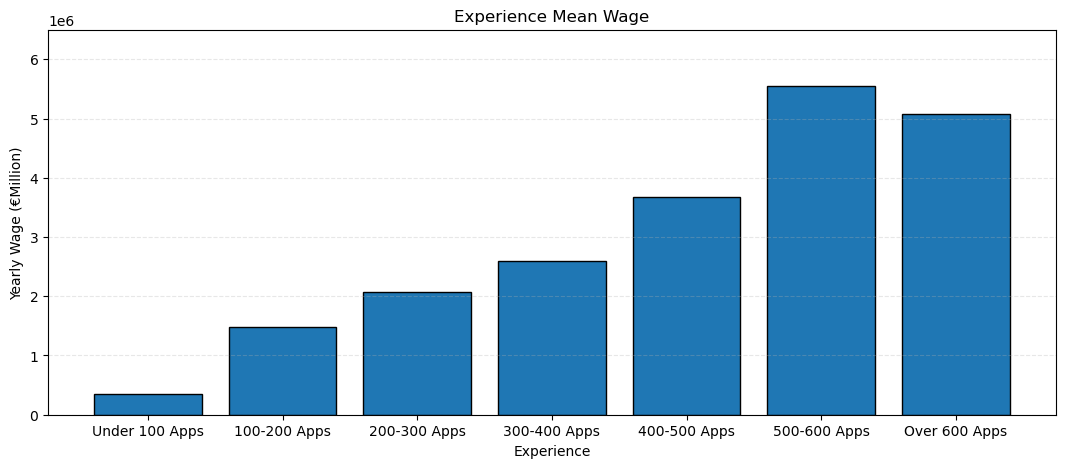

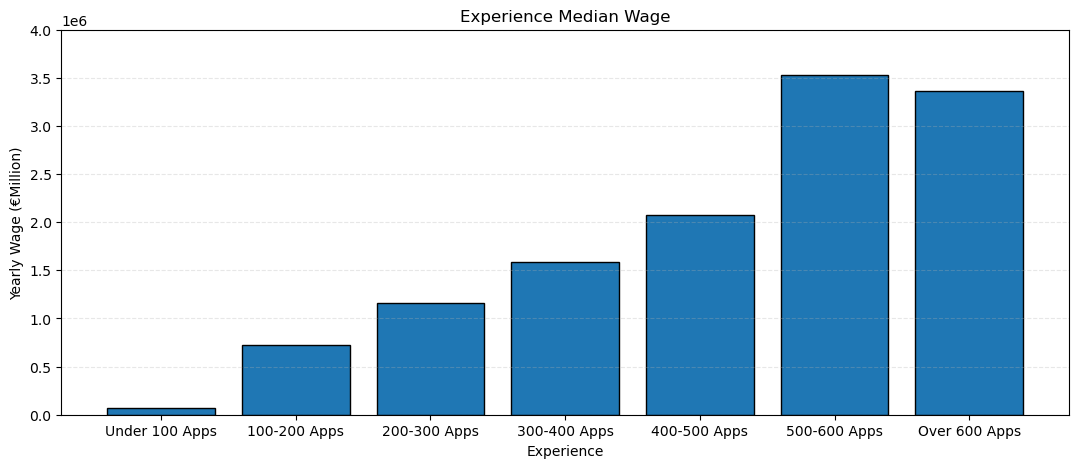

In [1504]:
#Graphing the data of experience level

#Mean
plt.figure (figsize = (13,5))
plt.bar (xp_salaries_mean.index, xp_salaries_mean.values, edgecolor = 'black')
plt.title ("Experience Mean Wage")
plt.xlabel ("Experience")
plt.ylabel ("Yearly Wage (€Million)")
plt.ylim(0, 6500000)
plt.grid (axis = 'y', linestyle = 'dashed', alpha = 0.3)

plt.show()

#Median
plt.figure (figsize = (13,5))
plt.bar (xp_salaries_median.index, xp_salaries_median.values, edgecolor = 'black')
plt.title ("Experience Median Wage")
plt.xlabel ("Experience")
plt.ylabel ("Yearly Wage (€Million)")
plt.ylim(0, 4000000)
plt.grid (axis = 'y', linestyle = 'dashed', alpha = 0.3)

plt.show()

### Cross-Sectional Comparative Analysis

#### Leagues

In [1508]:
# Relationship between experience level and wage within different leagues

## Mean Wage for each position by club or league

football_salaries["Experience level"] = pd.Categorical(football_salaries["Experience level"], categories=experience_order,ordered = True)

league_xp_salaries_mean = football_salaries.groupby(["League", "Experience level"], observed = True)["Wage"].mean()
league_xp_salaries_mean_currency = league_xp_salaries_mean.fillna(0).astype (int).map ("€{:,}".format)

## Median Wage
league_xp_salaries_median = football_salaries.groupby(["League", "Experience level"], observed = True)["Wage"].median()
league_xp_salaries_median_currency = league_xp_salaries_median.fillna(0).astype (int).map ("€{:,}".format)

#Grouping the Data together
league_xp_combined = pd.concat([league_xp_salaries_mean_currency, league_xp_salaries_median_currency], axis=1)
league_xp_combined.columns = ['Mean Wage', 'Median Wage']
display(league_xp_combined)


age_order = age_range_graph

football_salaries["Age Range"] = pd.Categorical(football_salaries["Age Range"], categories=age_order,ordered = True)

# Making it so the "Experience level" is ordered


#Relationship between age and wage within different leagues
league_age_salaries_mean = football_salaries.groupby(["League", "Age Range"], observed = True)["Wage"].mean()
league_age_salaries_mean_currency = league_age_salaries_mean.fillna(0).astype (int).map ("€{:,}".format)

## Median Wage
league_age_salaries_median = football_salaries.groupby(["League", "Age Range"], observed = True)["Wage"].median()
league_age_salaries_median_currency = league_age_salaries_median.fillna(0).astype (int).map ("€{:,}".format)

#Grouping the Data together
league_age_combined = pd.concat([league_age_salaries_mean_currency, league_age_salaries_median_currency], axis=1)
league_age_combined.columns = ['Mean Wage', 'Median Wage']
display(league_age_combined)


Mean Wage Median Wage
League            Experience level                        
Bundesliga        Under 100 Apps      €403,563     €86,000
                  100-200 Apps      €1,509,185    €897,000
                  200-300 Apps      €2,175,026  €1,118,000
                  300-400 Apps      €2,367,066  €1,462,000
                  400-500 Apps      €3,090,772  €2,363,500
                  500-600 Apps      €5,537,333  €4,299,000
                  Over 600 Apps     €7,748,500  €7,748,500
La Liga           Under 100 Apps      €312,070     €13,500
                  100-200 Apps      €1,417,213    €657,000
                  200-300 Apps      €1,597,059    €822,000
                  300-400 Apps      €2,249,421    €947,000
                  400-500 Apps      €2,410,551    €923,000
                  500-600 Apps      €6,773,437  €4,285,000
                  Over 600 Apps     €5,924,461  €3,880,000
Ligue 1 Uber Eats Under 100 Apps      €435,784    €220,000
                  100-200 Apps        €813,306    €465,500
                  200-300 Apps      €1,472,048    €719,500
                  300-400 Apps      €1,750,055    €628,000
                  400-500 Apps      €1,458,916    €478,000
                  500-600 Apps      €1,716,166  €1,288,000
                  Over 600 Apps     €3,677,800  €1,582,000
Premier League    Under 100 Apps      €596,804    €104,000
                  100-200 Apps      €3,571,022  €2,600,000
                  200-300 Apps      €3,951,142  €3,120,000
                  300-400 Apps      €4,531,940  €3,640,000
                  400-500 Apps      €5,844,520  €3,640,000
                  500-600 Apps      €6,656,538  €5,155,000
                  Over 600 Apps     €5,893,333  €6,240,000
Primeira Liga     Under 100 Apps       €91,142     €43,500
                  100-200 Apps        €302,600    €119,000
                  200-300 Apps        €350,987    €127,500
                  300-400 Apps        €665,363    €157,000
                  400-500 Apps        €359,000    €136,500
                  Over 600 Apps     €2,579,000  €2,579,000
Serie A           Under 100 Apps      €325,602     €58,750
                  100-200 Apps      €1,382,238    €957,000
                  200-300 Apps      €2,103,060  €1,595,000
                  300-400 Apps      €2,391,176  €1,767,000
                  400-500 Apps      €3,659,300  €2,155,500
                  500-600 Apps      €4,827,066  €2,852,000
                  Over 600 Apps     €3,181,000  €1,655,000

Mean Wage Median Wage
League            Age Range                        
Bundesliga        Under 18      €49,980     €29,000
                  18-21        €985,413    €448,000
                  21-24      €1,374,271    €775,000
                  24-27      €2,275,178  €1,118,000
                  27-30      €1,957,250  €1,033,500
                  30-33      €2,240,961  €1,446,500
                  Over 33    €1,981,647    €881,000
La Liga           Under 18      €87,101     €13,000
                  18-21        €896,116    €278,000
                  21-24      €1,094,010    €412,000
                  24-27      €1,925,893    €858,000
                  27-30      €2,245,535    €937,500
                  30-33      €2,286,727    €784,000
                  Over 33    €2,939,111  €1,227,000
Ligue 1 Uber Eats Under 18      €58,020     €29,000
                  18-21        €444,264    €242,000
                  21-24        €842,025    €467,000
                  24-27      €1,050,188    €461,500
                  27-30      €1,584,187    €734,500
                  30-33      €1,299,312    €657,500
                  Over 33    €1,229,890    €515,500
Premier League    Under 18     €174,511     €52,000
                  18-21        €720,806    €130,000
                  21-24      €3,159,250  €2,600,000
                  24-27      €4,052,031  €3,120,000
                  27-30      €4,734,500  €3,900,000
                  30-33      €4,754,866  €3,120,000
                  Over 33    €3,643,200  €3,380,000
Primeira Liga     Under 18      €55,098     €30,000
                  18-21         €74,000     €31,000
                  21-24        €239,157     €87,500
                  24-27        €335,934    €123,000
                  27-30        €381,758    €121,500
                  30-33        €231,765    €123,000
                  Over 33      €433,115    €123,000
Serie A           Under 18      €93,918     €27,500
                  18-21        €305,938     €50,000
                  21-24      €1,380,000    €861,000
                  24-27      €1,783,908  €1,250,000
                  27-30      €2,513,879  €1,595,000
                  30-33      €2,051,736  €1,354,000
                  Over 33    €2,621,193  €1,595,000

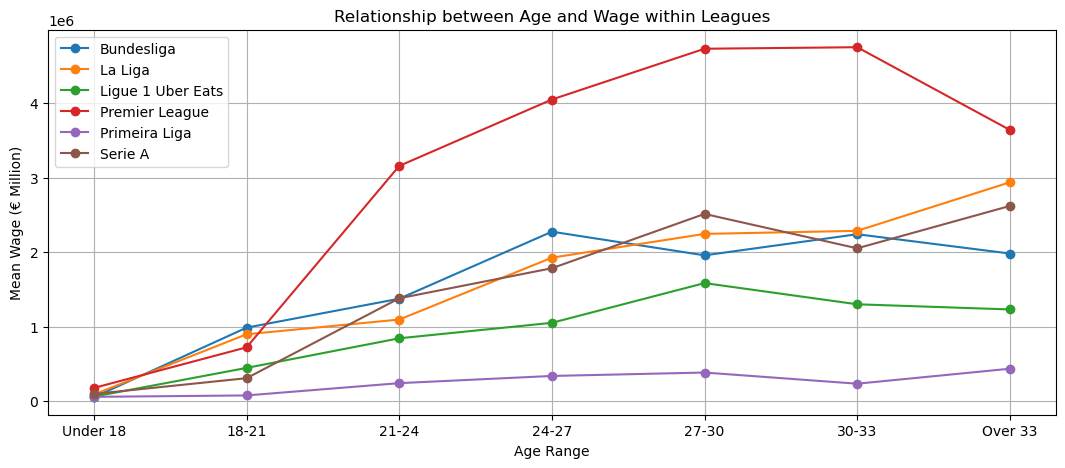

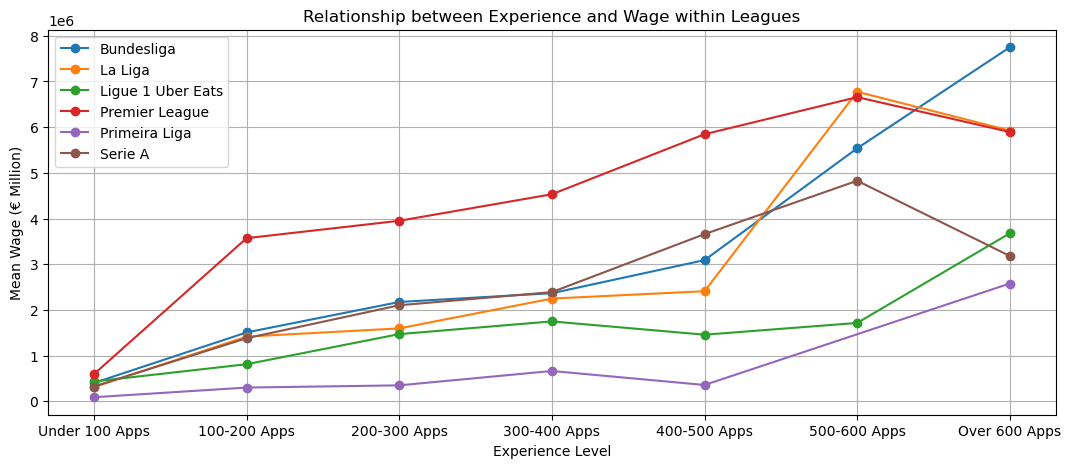

In [1371]:
### Bar graph on Leagues ###

# Unstack the groupby result to reshape for plotting
league_age_salaries_mean = league_age_salaries_mean.reset_index()
plt.figure (figsize = (13,5))

#Creating a loop to look at each of the leagues
for league in league_age_salaries_mean ["League"].unique():
    league_age_data = league_age_salaries_mean[league_age_salaries_mean["League"] == league]
    plt.plot(league_age_data["Age Range"], league_age_data["Wage"], marker='o', linestyle='-', label=league)

plt.xlabel('Age Range')
plt.ylabel('Mean Wage (€ Million)')
plt.title('Relationship between Age and Wage within Leagues')
plt.legend()
plt.grid(True)




### Scatter Graph for Experience ###

#Making the x axis in categorical order
league_xp_salaries_mean = league_xp_salaries_mean.reset_index()
football_salaries["Experience level"] = pd.Categorical(football_salaries["Experience level"], categories=experience_order,ordered = True)
plt.figure (figsize = (13,5))

#Creating a loop to look at each of the leagues
for league in league_xp_salaries_mean ["League"].unique():
    league_xp_data = league_xp_salaries_mean[league_xp_salaries_mean["League"] == league]
    plt.plot(league_xp_data["Experience level"], league_xp_data["Wage"], marker='o', linestyle='-', label=league)
    plt.legend()
    plt.xlabel('Experience Level')
    plt.ylabel('Mean Wage (€ Million)')
    plt.title('Relationship between Experience and Wage within Leagues')
    plt.legend()
    plt.grid(True)

plt.show()



#### Position

In [1491]:
#Position in Clubs Mean Value
###Age###

# Mean Wage by Position within Top Clubs
pos_age_salaries_mean = football_salaries.groupby(["Position", "Age Range"], observed = True)["Wage"].mean()
pos_age_salaries_mean_currency = pos_age_salaries_mean.fillna(0).astype(int).map("€{:,}".format)

# Median Wage by Position within Top Clubs
pos_age_salaries_median = football_salaries.groupby(["Position", "Age Range"], observed = True)["Wage"].median()
pos_age_salaries_median_currency = pos_age_salaries_median.fillna(0).astype(int).map("€{:,}".format)

#Grouping them
pos_age_combined = pd.concat([pos_age_salaries_mean_currency, pos_age_salaries_median_currency], axis=1)
pos_age_combined.columns = ['Mean Wage', 'Median Wage']
display(pos_age_combined)


### Position ###


# Mean Wage by Position within Top Clubs
pos_xp_salaries_mean = football_salaries.groupby(["Position", "Experience level"], observed = True)["Wage"].mean()
pos_xp_salaries_mean_currency = pos_xp_salaries_mean.fillna(0).astype(int).map("€{:,}".format)

# Median Wage by Position within Top Clubs
pos_xp_salaries_median = football_salaries.groupby(["Position", "Experience level"], observed = True)["Wage"].median()
pos_xp_salaries_median_currency = pos_xp_salaries_median.fillna(0).astype(int).map("€{:,}".format)

#Grouping them
pos_xp_combined = pd.concat([pos_xp_salaries_mean_currency, pos_xp_salaries_median_currency], axis=1)
pos_xp_combined.columns = ['Mean Wage', 'Median Wage']
display(pos_xp_combined)


Mean Wage Median Wage
Position   Age Range                        
Defender   Under 18      €62,683     €29,000
           18-21        €439,964     €97,000
           21-24      €1,355,833    €672,000
           24-27      €1,850,564  €1,003,000
           27-30      €2,127,727    €998,000
           30-33      €2,287,359  €1,345,000
           Over 33    €2,233,534  €1,442,000
Forward    Under 18      €87,925     €29,000
           18-21        €502,253    €104,000
           21-24      €1,400,111    €438,000
           24-27      €1,691,033    €903,000
           27-30      €2,802,209  €1,567,000
           30-33      €2,516,105  €1,118,500
           Over 33    €2,902,888  €1,290,000
Goalkeeper Under 18      €59,202     €29,000
           18-21        €125,403     €52,000
           21-24        €682,345    €220,000
           24-27      €1,039,601    €559,000
           27-30      €2,207,323  €1,031,000
           30-33      €1,774,187    €817,000
           Over 33    €1,712,276    €862,500
Midfielder Under 18     €179,229     €31,500
           18-21        €589,707    €104,000
           21-24      €1,449,778    €780,000
           24-27      €2,379,497  €1,290,000
           27-30      €2,746,928  €1,664,000
           30-33      €2,918,644  €1,350,500
           Over 33    €2,247,737    €793,500

Mean Wage Median Wage
Position   Experience level                        
Defender   Under 100 Apps      €358,754     €71,500
           100-200 Apps      €1,551,043    €731,000
           200-300 Apps      €1,984,968  €1,072,000
           300-400 Apps      €2,604,881  €1,560,000
           400-500 Apps      €3,276,209  €2,235,000
           500-600 Apps      €4,993,785  €4,657,500
           Over 600 Apps     €4,123,285  €2,579,000
Forward    Under 100 Apps      €329,507     €61,500
           100-200 Apps      €1,421,396    €632,000
           200-300 Apps      €2,102,829  €1,188,000
           300-400 Apps      €2,195,838  €1,603,000
           400-500 Apps      €4,531,884  €3,219,500
           500-600 Apps      €5,394,294  €2,786,000
           Over 600 Apps     €5,592,500  €1,817,500
Goalkeeper Under 100 Apps      €162,175     €52,000
           100-200 Apps        €997,014    €566,000
           200-300 Apps      €1,666,253    €903,000
           300-400 Apps      €1,892,702  €1,141,000
           400-500 Apps      €2,904,739  €1,328,000
           500-600 Apps      €5,261,000  €2,682,000
           Over 600 Apps     €4,394,428  €3,362,000
Midfielder Under 100 Apps      €446,764     €78,000
           100-200 Apps      €1,535,655    €802,000
           200-300 Apps      €2,306,719  €1,340,000
           300-400 Apps      €3,031,631  €1,881,500
           400-500 Apps      €3,967,872  €1,890,000
           500-600 Apps      €6,367,000  €4,729,000
           Over 600 Apps     €6,100,571  €5,200,000

<Figure size 1300x500 with 0 Axes>

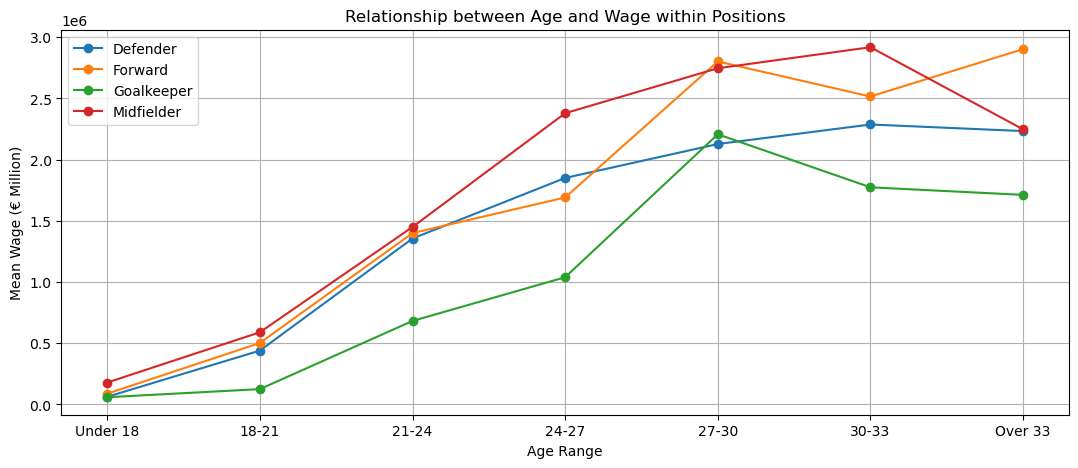

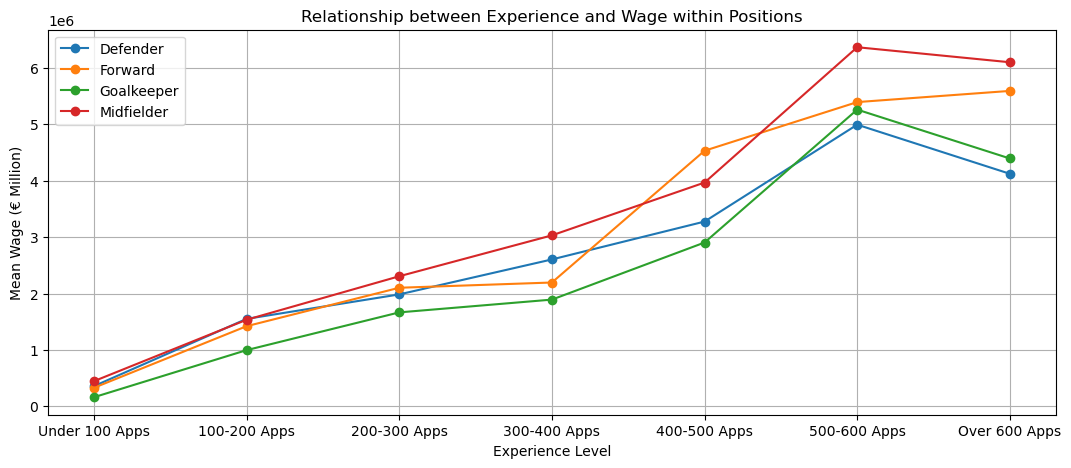

In [1493]:
### Bar Graph for Age ###

pos_age_salaries_mean = pos_age_salaries_mean.reset_index()
plt.figure (figsize = (13,5))

pos_age_graph = pos_age_salaries_mean.pivot(index='Age Range', columns='Position', values='Wage')

# Plotting the grouped bar chart
plt.figure (figsize = (13,5))

for pos in pos_age_salaries_mean ["Position"].unique():
    pos_age_data = pos_age_salaries_mean[pos_age_salaries_mean["Position"] == pos]
    plt.plot(pos_age_data["Age Range"], pos_age_data["Wage"], marker='o', linestyle='-', label=pos)

plt.xlabel('Age Range')
plt.ylabel('Mean Wage (€ Million)')
plt.title('Relationship between Age and Wage within Positions')
plt.legend()
plt.grid(True)


### Scatter graph for experience ###
pos_xp_salaries_mean = pos_xp_salaries_mean.reset_index()

plt.figure (figsize = (13,5))

#Looping so it looks at each position, looking at the experience and wage.
for pos in pos_xp_salaries_mean ["Position"].unique():
    pos_xp_data = pos_xp_salaries_mean[pos_xp_salaries_mean ["Position"] == pos]
    plt.plot(pos_xp_data["Experience level"], pos_xp_data["Wage"], marker='o', linestyle='-', label=pos)

plt.xlabel('Experience Level')
plt.ylabel('Mean Wage (€ Million)')
plt.title('Relationship between Experience and Wage within Positions')
plt.legend()
plt.grid(True)

plt.show()



#### Nationality - Continents

In [1315]:
### Age ###

# Mean Wage by Position within Top Clubs
cont_age_salaries_mean = football_salaries.groupby(["Continents", "Age Range"], observed = True)["Wage"].mean()
cont_age_salaries_mean_currency = cont_age_salaries_mean.fillna(0).astype(int).map("€{:,}".format)

# Median Wage by Position within Top Clubs
cont_age_salaries_median = football_salaries.groupby(["Continents", "Age Range"], observed = True)["Wage"].median()
cont_age_salaries_median_currency = cont_age_salaries_median.fillna(0).astype(int).map("€{:,}".format)

#Grouping them
cont_age_combined = pd.concat([cont_age_salaries_mean_currency, cont_age_salaries_median_currency], axis=1)
cont_age_combined.columns = ['Mean Wage', 'Median Wage']
display(cont_age_combined)

### Experience ###

cont_xp_salaries_mean = football_salaries.groupby(["Continents", "Experience level"], observed = True)["Wage"].mean()
cont_xp_salaries_mean_currency = cont_xp_salaries_mean.fillna(0).astype(int).map("€{:,}".format)

# Median Wage by Position within Top Clubs
cont_xp_salaries_median = football_salaries.groupby(["Continents", "Experience level"], observed = True)["Wage"].median()
cont_xp_salaries_median_currency = cont_xp_salaries_median.fillna(0).astype(int).map("€{:,}".format)

#Grouping them
cont_xp_combined = pd.concat([cont_xp_salaries_mean_currency, cont_xp_salaries_median_currency], axis=1)
cont_xp_combined.columns = ['Mean Wage', 'Median Wage']
display(cont_xp_combined)


Mean Wage Median Wage
Continents                      Age Range                        
Africa                          Under 18      €59,641     €22,500
                                18-21        €366,190     €65,000
                                21-24      €1,034,011    €478,000
                                24-27      €1,335,890    €638,000
                                27-30      €2,297,606    €928,000
                                30-33      €3,984,588  €2,084,000
                                Over 33      €225,937    €109,250
Asia                            Under 18      €26,166     €28,500
                                18-21        €311,550     €81,250
                                21-24        €633,863    €112,000
                                24-27      €1,213,323    €430,000
                                27-30      €2,139,000  €1,548,000
                                30-33        €688,000    €688,000
                                Over 33      €841,333    €881,000
Caribbean and Other Territories 18-21        €104,000    €104,000
                                21-24      €1,456,000  €1,456,000
Europe                          Under 18      €94,370     €29,000
                                18-21        €442,607     €89,500
                                21-24      €1,387,589    €672,000
                                24-27      €2,158,373  €1,148,500
                                27-30      €2,473,744  €1,300,000
                                30-33      €2,383,146  €1,182,000
                                Over 33    €2,360,044  €1,121,000
North America                   Under 18     €123,071     €35,000
                                18-21        €853,607    €130,000
                                21-24      €1,673,076    €704,000
                                24-27      €1,469,416    €910,500
                                27-30      €2,222,888  €1,560,000
                                30-33      €1,825,000    €726,000
                                Over 33    €2,439,750  €1,148,500
Oceania                         Under 18      €31,000     €31,000
                                18-21        €139,666    €104,000
                                21-24      €1,132,666    €174,000
                                24-27        €332,000    €332,000
                                27-30      €4,160,000  €4,160,000
South America                   Under 18     €357,364     €29,000
                                18-21        €770,500    €115,500
                                21-24      €1,432,525    €525,000
                                24-27      €1,632,565    €560,500
                                27-30      €2,295,525    €730,500
                                30-33      €1,886,725  €1,472,000
                                Over 33    €1,939,000  €1,435,000

Mean Wage Median Wage
Continents                      Experience level                        
Africa                          Under 100 Apps      €260,391     €60,500
                                100-200 Apps        €987,242    €565,500
                                200-300 Apps      €1,837,875  €1,319,000
                                300-400 Apps      €3,091,454  €1,469,500
                                400-500 Apps      €6,942,458  €6,604,000
                                500-600 Apps      €4,680,000  €3,120,000
Asia                            Under 100 Apps      €120,321     €56,750
                                100-200 Apps        €960,156    €476,500
                                200-300 Apps      €1,077,733    €381,000
                                300-400 Apps      €1,646,750  €1,561,000
                                400-500 Apps      €3,143,750  €1,053,500
                                Over 600 Apps       €881,000    €881,000
Caribbean and Other Territories Under 100 Apps      €780,000    €780,000
Europe                          Under 100 Apps      €339,582     €67,000
                                100-200 Apps      €1,587,457    €804,500
                                200-300 Apps      €2,091,973  €1,163,000
                                300-400 Apps      €2,516,950  €1,595,000
                                400-500 Apps      €3,404,337  €2,114,500
                                500-600 Apps      €6,331,926  €4,160,000
                                Over 600 Apps     €5,847,000  €4,237,500
North America                   Under 100 Apps      €303,992     €57,000
                                100-200 Apps      €1,464,000  €1,032,000
                                200-300 Apps      €2,422,000    €910,500
                                300-400 Apps      €1,670,772  €1,035,000
                                400-500 Apps      €3,647,166  €2,730,000
                                Over 600 Apps     €1,148,500  €1,148,500
Oceania                         Under 100 Apps       €76,000     €84,500
                                100-200 Apps        €969,000    €291,000
                                500-600 Apps      €4,160,000  €4,160,000
South America                   Under 100 Apps      €576,299    €111,000
                                100-200 Apps      €1,555,691    €662,000
                                200-300 Apps      €2,426,807  €1,294,000
                                300-400 Apps      €3,278,400  €2,025,000
                                400-500 Apps      €2,952,111    €923,000
                                500-600 Apps      €3,002,545  €2,340,000
                                Over 600 Apps     €1,781,000  €1,781,000

<Figure size 1300x500 with 0 Axes>

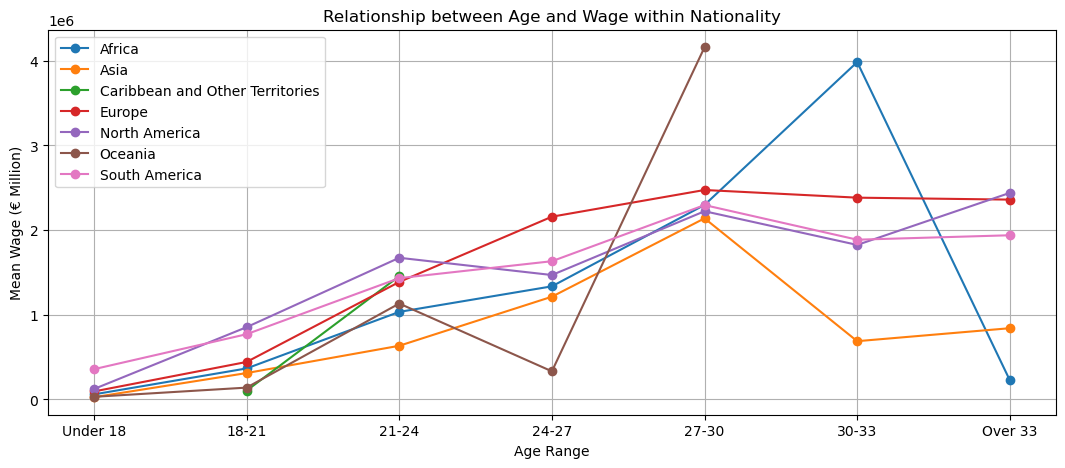

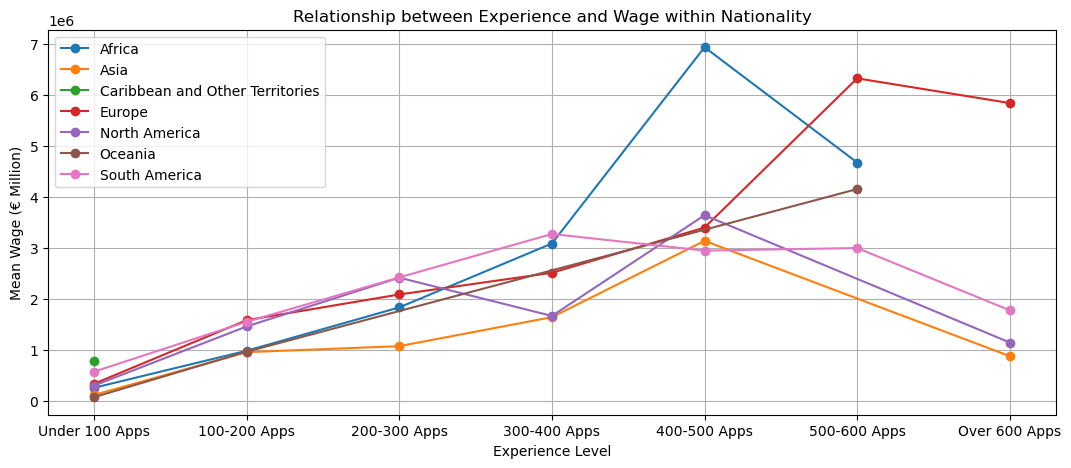

In [1319]:

### Age ###
cont_age_salaries_mean = cont_age_salaries_mean.reset_index()
plt.figure (figsize = (13,5))

cont_age_graph = cont_age_salaries_mean.pivot(index='Age Range', columns='Continents', values='Wage')

# Plotting the grouped bar chart
plt.figure (figsize = (13,5))

for cont in cont_age_salaries_mean ["Continents"].unique():
    cont_age_data = cont_age_salaries_mean[cont_age_salaries_mean["Continents"] == cont]
    plt.plot(cont_age_data["Age Range"], cont_age_data["Wage"], marker='o', linestyle='-', label=cont)

plt.xlabel('Age Range')
plt.ylabel('Mean Wage (€ Million)')
plt.title('Relationship between Age and Wage within Nationality')
plt.legend()
plt.grid(True)

### Experience ###
cont_xp_salaries_mean = cont_xp_salaries_mean.reset_index()

plt.figure (figsize = (13,5))

for cont in cont_xp_salaries_mean ["Continents"].unique():
    cont_xp_data = cont_xp_salaries_mean[cont_xp_salaries_mean ["Continents"] == cont]
    plt.plot(cont_xp_data["Experience level"], cont_xp_data["Wage"], marker='o', linestyle='-', label=cont)

plt.xlabel('Experience Level')
plt.ylabel('Mean Wage (€ Million)')
plt.title('Relationship between Experience and Wage within Nationality')
plt.legend()
plt.grid(True)

plt.show()


## Predictive Modeling 

### T-Test League and Wage

In [1434]:
from scipy.stats import ttest_ind

#Focusing the data on each league (bundesliga, la liga, serie A) and its wages
bundesliga_wages = football_salaries[football_salaries['League'] == "Bundesliga"]['Wage']
la_liga_wages = football_salaries[football_salaries["League"] == 'La Liga']["Wage"]
serie_a_wages = football_salaries [football_salaries ["League"] == 'Serie A'] ["Wage"]
prem_wages = football_salaries [football_salaries ["League"] == 'Premier League'] ["Wage"]

#Making the two sample T Test 
ttest_1, pval_1 = ttest_ind(la_liga_wages, bundesliga_wages, equal_var=False)

print ("Hypothesis\n")
print ("H_0: There is no significant difference in the mean wage between the two leagues")
print ("H_1: There is significant difference in the mean wage between the two leagues\n")


print ("Two Sample T_Test\n")
# Print results
print ("Two Sample T-Test on Bundesliga and La Liga:")
print(f"T-statistic: {ttest_1}")
print(f"P-value: {pval_1}")

ttest_2, pval_2 = ttest_ind(la_liga_wages, serie_a_wages, equal_var=False)

# Print results
print ("\nTwo Sample T-Test on Serie A and La Liga:")
print(f"T-statistic: {ttest_2}")
print(f"P-value: {pval_2}")

ttest_3, pval_3 = ttest_ind(bundesliga_wages, serie_a_wages, equal_var=False)

# Print results
print ("\nTwo Sample T-Test on Serie A and Bundesliga:")
print(f"T-statistic: {ttest_3}")
print(f"P-value: {pval_3}")


ttest_4, pval_4 = ttest_ind(prem_wages, serie_a_wages, equal_var=False)

# Print results
print ("\nTwo Sample T-Test on Serie A and Bundesliga:")
print(f"T-statistic: {ttest_4}")
print(f"P-value: {pval_4}")

Hypothesis

H_0: There is no significant difference in the mean wage between the two leagues
H_1: There is significant difference in the mean wage between the two leagues

Two Sample T_Test

Two Sample T-Test on Bundesliga and La Liga:
T-statistic: 0.7601990983409626
P-value: 0.4472941419538674

Two Sample T-Test on Serie A and La Liga:
T-statistic: 1.346424507104844
P-value: 0.1784637799902052

Two Sample T-Test on Serie A and Bundesliga:
T-statistic: 0.5640534131602011
P-value: 0.5728354160303561

Two Sample T-Test on Serie A and Bundesliga:
T-statistic: 7.925892032763583
P-value: 4.403632363155392e-15


### T-Test Position and Wage

In [1495]:
#Focusing the data on each position and its wages
forward_wages = football_salaries[football_salaries['Position'] == "Forward"]['Wage']
midfielder_wages = football_salaries[football_salaries["Position"] == 'Midfielder']["Wage"]
defender_wages = football_salaries [football_salaries ["Position"] == 'Defender'] ["Wage"]
goalkeeper_wages = football_salaries [football_salaries ["Position"] == 'Goalkeeper'] ["Wage"]


#Making the two sample T Test 
ttest_1, pval_1 = ttest_ind(forward_wages, midfielder_wages, equal_var=False)

print ("Hypothesis\n")
print ("H_0: There is no significant difference in the mean wage between the two positions")
print ("H_1: There is significant difference in the mean wage between the two positions\n")


print ("Two Sample T_Test\n")
# Print results
print ("Two Sample T-Test on Forward and Midfielers (Offense):")
print(f"T-statistic: {ttest_1}")
print(f"P-value: {pval_1}")

ttest_5, pval_5 = ttest_ind(defender_wages, goalkeeper_wages, equal_var=False)

# Print results
print ("\nTwo Sample T-Test on Defenders and Goalkeepers (Defence):\n")
print(f"T-statistic: {ttest_5}")
print(f"P-value: {pval_5}")



ttest_2, pval_2 = ttest_ind(forward_wages, defender_wages, equal_var=False)

# Print results
print ("\nTwo Sample T-Test on Forward and Defenders:")
print(f"T-statistic: {ttest_2}")
print(f"P-value: {pval_2}")

ttest_3, pval_3 = ttest_ind(defender_wages, midfielder_wages, equal_var=False)

# Print results
print ("\nTwo Sample T-Test on Defender and Midfielder:")
print(f"T-statistic: {ttest_3}")
print(f"P-value: {pval_3}")


ttest_6, pval_6 = ttest_ind(goalkeeper_wages, midfielder_wages, equal_var=False)

# Print results
print ("\nTwo Sample T-Test on GoalKeeper and Midfielder:")
print(f"T-statistic: {ttest_6}")

ttest_7, pval_7 = ttest_ind(goalkeeper_wages, forward_wages, equal_var=False)

# Print results
print ("\nTwo Sample T-Test on Goalkeeper and Forward:")
print(f"T-statistic: {ttest_7}")

Hypothesis

H_0: There is no significant difference in the mean wage between the two positions
H_1: There is significant difference in the mean wage between the two positions

Two Sample T_Test

Two Sample T-Test on Forward and Midfielers (Offense):
T-statistic: -2.849191645375717
P-value: 0.004432200893184066

Two Sample T-Test on Defenders and Goalkeepers (Defence):

T-statistic: 2.3985773807979185
P-value: 0.01671948953991936

Two Sample T-Test on Forward and Defenders:
T-statistic: -0.5129226476563792
P-value: 0.6080788827416124

Two Sample T-Test on Defender and Midfielder:
T-statistic: -2.8839999461593195
P-value: 0.00396366085541915

Two Sample T-Test on GoalKeeper and Midfielder:
T-statistic: -4.321693946627501

Two Sample T-Test on Goalkeeper and Forward:
T-statistic: -1.7229055730573588


## Linear Regression Models

### Linear Regression Model: Experience Correlation with Wages in different Leagues

In [1463]:
#Making the league numeric, (a boolean), so that it can be graphed.
football_salaries_numeric = pd.get_dummies (football_salaries, columns = ['League'], drop_first = False)

#Makes multiple coloumns for each league in the boolean form of True or False
league_coloumns_numeric = football_salaries_numeric.filter(like='League', axis=1).columns



#Plotting the size of the visualisation
plt.figure (figsize = (19,30))

# Creating a loop that goes through the numeric league coloumns, starting from 1 
for i, league in enumerate(league_coloumns_numeric, start=1):
    # Filters the data so that it places the correct players in the right league, making so that players that are marked as 1 in the correct league
    leagues_data = football_salaries_numeric[football_salaries_numeric[league] == 1]
    #Fitting a linear regression model which looks at the experience and wage
   
    #using the organised data now and select the players that apply to the following variables of experience and wage
    experience = leagues_data[['Apps', 'Caps']] 
    wage = leagues_data['Wage']  
    linear_model = LinearRegression().fit(experience, wage)

    #using the organised data now and select the players that apply to the following variables of experience and wage
    #Printing the results of the model coeffiecint + rounding the to 1 decimal place
    print(f"\n {league}:")
    print (f"scope: {round (linear_model.coef_.mean(), 1)}")
    print(f"  Intercept: {round (linear_model.intercept_, 1)}") #the intercept
    print(f"  Apps Coefficient: {round (linear_model.coef_[0], 1)}") #Getting the coefficient of apps through slicing 
    print(f"  Caps Coefficient: {round (linear_model.coef_[1], 1)}") #Getting the coefficient of caps through slicing


 League_Bundesliga:
scope: 27480.6
  Intercept: 439801.1
  Apps Coefficient: 3100.9
  Caps Coefficient: 51860.4

 League_La Liga:
scope: 31644.7
  Intercept: 413032.7
  Apps Coefficient: 2690.3
  Caps Coefficient: 60599.2

 League_Ligue 1 Uber Eats:
scope: 19982.1
  Intercept: 382791.9
  Apps Coefficient: 1597.1
  Caps Coefficient: 38367.0

 League_Premier League:
scope: 29523.3
  Intercept: 706497.2
  Apps Coefficient: 8214.7
  Caps Coefficient: 50832.0

 League_Primeira Liga:
scope: 8794.0
  Intercept: 74224.0
  Apps Coefficient: 916.7
  Caps Coefficient: 16671.2

 League_Serie A:
scope: 19633.4
  Intercept: 414466.7
  Apps Coefficient: 3580.8
  Caps Coefficient: 35686.1


<Figure size 1900x3000 with 0 Axes>

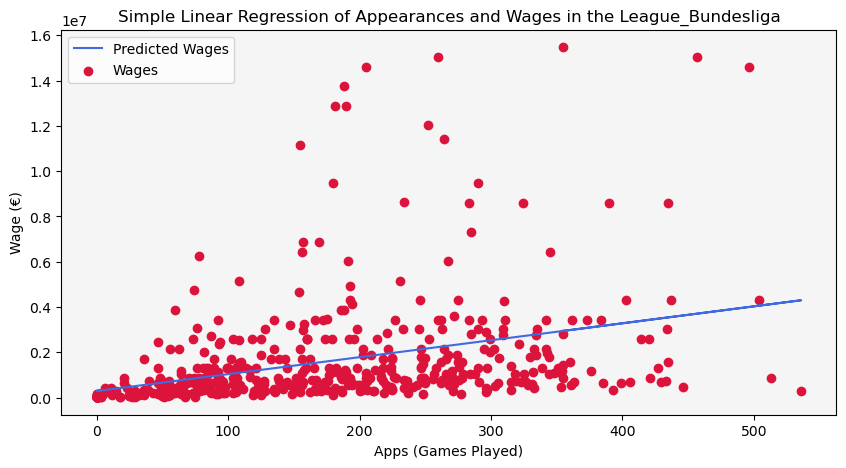

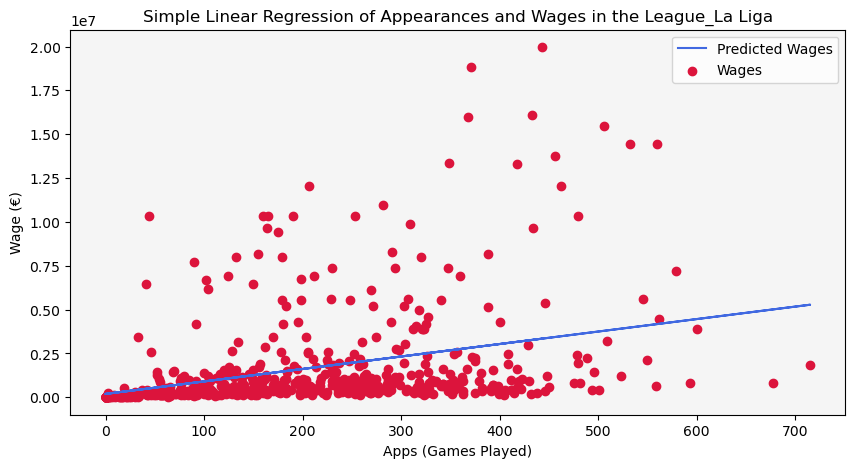

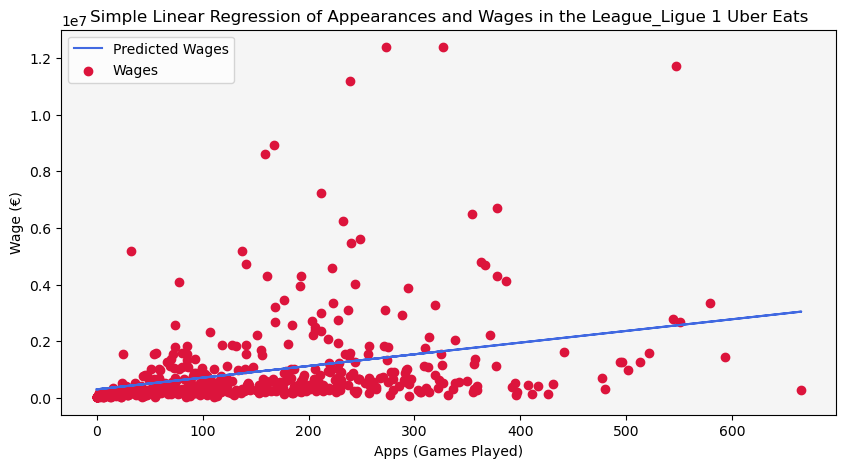

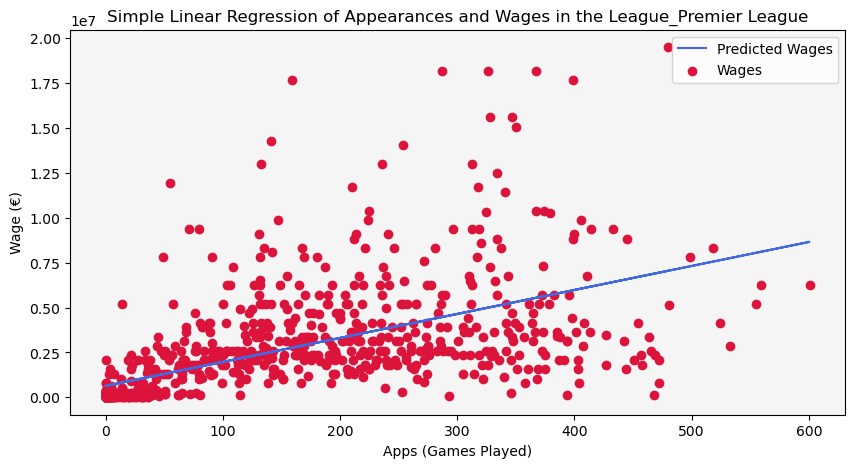

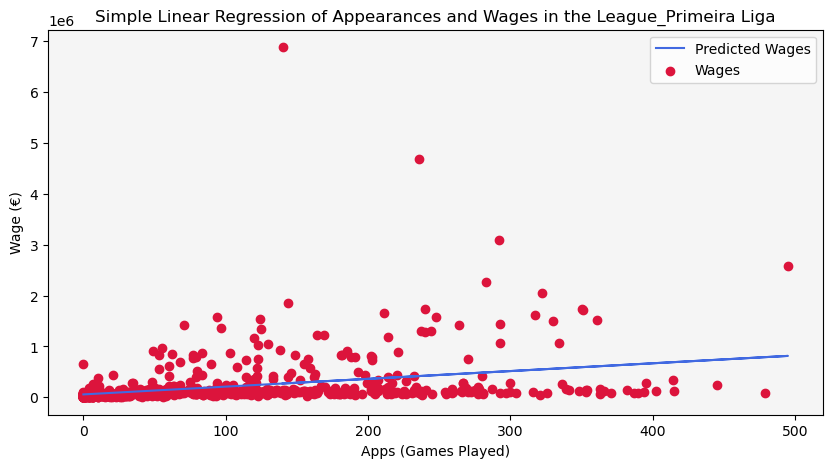

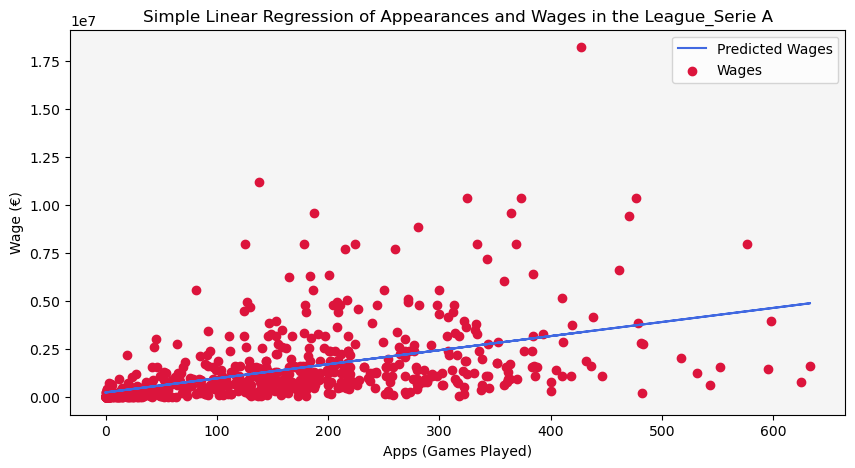

In [1465]:
# Looping through each of the leagues wages
for league in league_coloumns_numeric:
    league_data = football_salaries_numeric[football_salaries_numeric[league] == 1]
    plt.figure (figsize = (10,5)) #Plotting the figure size
    Apps_Numeric = league_data[["Apps"]]  
    Wage_Numeric = league_data["Wage"] 
    
    # Making the simple linear regression model
    linear_regression = LinearRegression()
    linear_regression.fit(Apps_Numeric, Wage_Numeric)
    
    # Plot actual data points
    plt.plot(Apps_Numeric, linear_regression.predict(Apps_Numeric), color='royalblue', label="Predicted Wages")
    plt.scatter(Apps_Numeric, Wage_Numeric, color='crimson', label="Wages")
    
    # Customize the plot
    plt.gca().set_facecolor('whitesmoke')
    plt.legend() 
    plt.title(f"Simple Linear Regression of Appearances and Wages in the {league}")
    plt.xlabel("Apps (Games Played)")
    plt.ylabel("Wage (€)")
    
plt.show()

### Linear Regression Model: Age Group Correlation with Wages in different Leagues

In [1381]:
#Making the league numeric, (a boolean), so that it can be graphed.
football_salaries_numeric = pd.get_dummies (football_salaries, columns = ['League'], drop_first = True)

#Makes multiple coloumns for each league in the boolean form of True or False
league_coloumns_numeric = football_salaries_numeric.filter(like='League', axis=1).columns



#Plotting the size of the visualisation
plt.figure (figsize = (19,30))

# Creating a loop that goes through the numeric league coloumns, starting from 1 
for i, league in enumerate(league_coloumns_numeric, start=1):
    # Filters the data so that it places the correct players in the right league, making so that players that are marked as 1 in the correct league
    leagues_data = football_salaries_numeric[football_salaries_numeric[league] == 1]
    #Fitting a linear regression model which looks at the experience and wage
   
    #using the organised data now and select the players that apply to the following variables of experience and wage
    age_range_linear = leagues_data[['Age', 'Caps']] 
    wage = leagues_data['Wage']  
    linear_model = LinearRegression().fit(age_range_linear, wage)

    #using the organised data now and select the players that apply to the following variables of experience and wage
    #Printing the results of the model coeffiecint + rounding the to 1 decimal place
    print(f"\n {league}:")
    print (f"scope: {round (linear_model.coef_.mean(), 1)}")
    print(f"  Intercept: {round (linear_model.intercept_, 1)}") #the intercept
    print(f"  Age Coefficient: {round (linear_model.coef_[0], 1)}") #Getting the coefficient of caps through slicing


 League_La Liga:
scope: 51527.6
  Intercept: -94951.5
  Age Coefficient: 38492.6

 League_Ligue 1 Uber Eats:
scope: 26389.2
  Intercept: 333909.0
  Age Coefficient: 10909.8

 League_Premier League:
scope: 121529.0
  Intercept: -2606711.0
  Age Coefficient: 183678.8

 League_Primeira Liga:
scope: 14685.6
  Intercept: -93137.8
  Age Coefficient: 10590.1

 League_Serie A:
scope: 51800.8
  Intercept: -640397.3
  Age Coefficient: 62403.7


<Figure size 1900x3000 with 0 Axes>

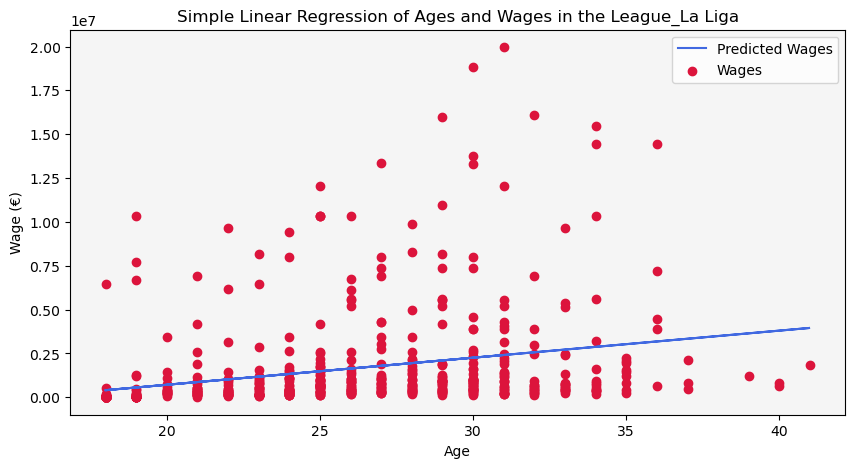

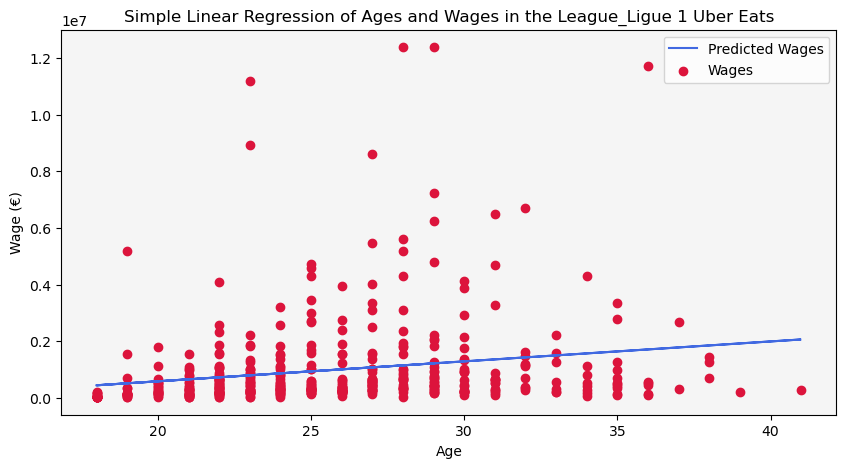

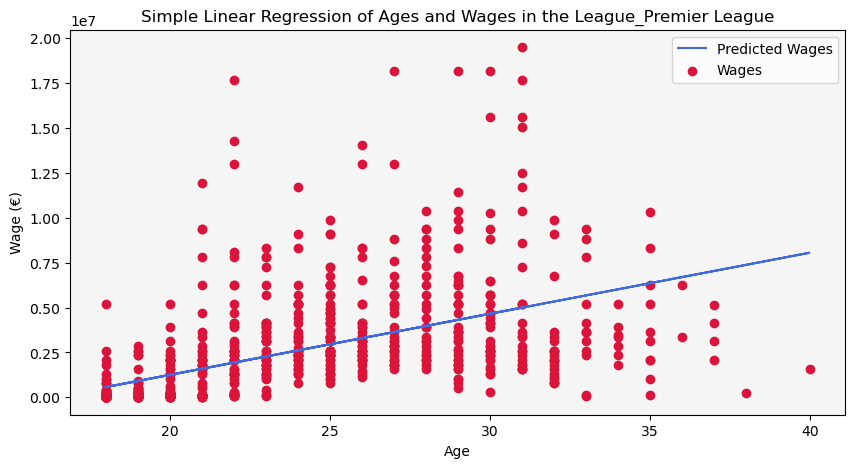

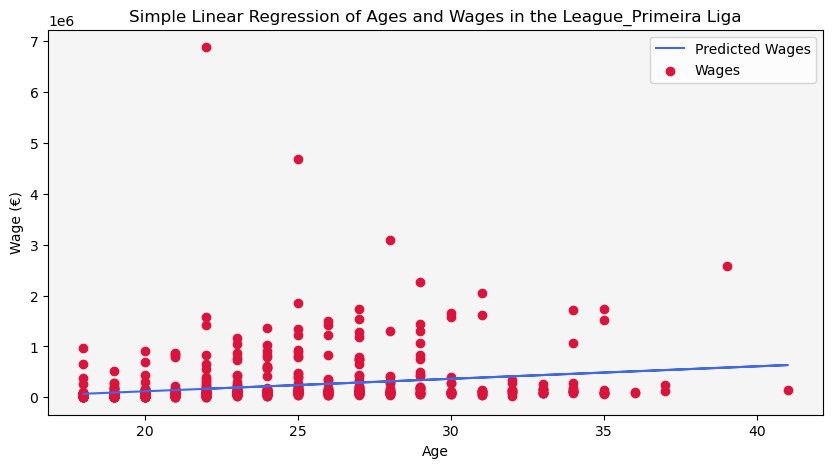

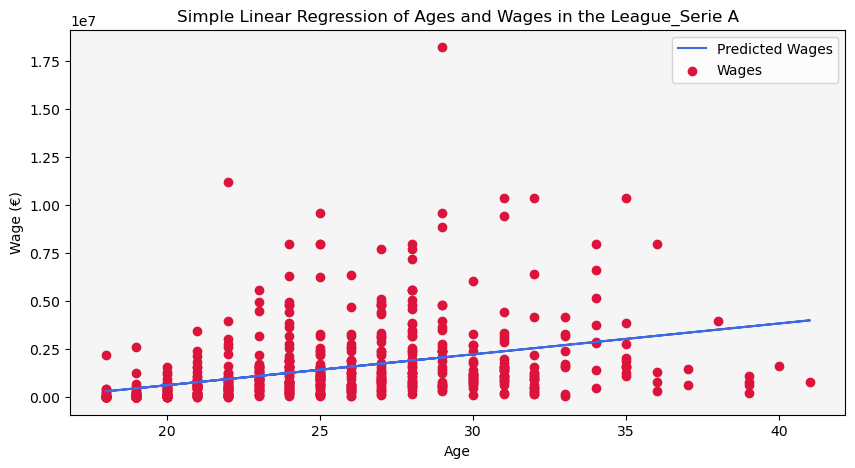

In [1383]:
# Looping through each of the leagues wages
for league in league_coloumns_numeric:
    league_data = football_salaries_numeric[football_salaries_numeric[league] == 1]
    plt.figure (figsize = (10,5)) #Plotting the figure size
    Age_Numeric = league_data[["Age"]]  
    Wage_Numeric = league_data["Wage"] 
    
    # Making the simple linear regression model
    linear_regression = LinearRegression()
    linear_regression.fit(Age_Numeric, Wage_Numeric)
    
    # Plot actual data points
    plt.plot(Age_Numeric, linear_regression.predict(Age_Numeric), color='royalblue', label="Predicted Wages")
    plt.scatter(Age_Numeric, Wage_Numeric, color='crimson', label="Wages")

    
    
    # Customize the plot
    plt.gca().set_facecolor('whitesmoke')
    plt.legend() 
    plt.title(f"Simple Linear Regression of Ages and Wages in the {league}")
    plt.xlabel("Age")
    plt.ylabel("Wage (€)")
    
plt.show()

#### Linear Regression Model: Positions Correlation with Wages in different Age Groups

In [1385]:
#Making the league numeric, (a boolean), so that it can be graphed.

football_salaries_positions_numeric = pd.get_dummies (football_salaries, columns = ['Position'])


#Makes multiple coloumns for each league in the boolean form of True or False
position_coloumns_numeric = football_salaries_positions_numeric.filter(like='Position', axis=1).columns

#Plotting the size of the visualisation
plt.figure (figsize = (19,30))

# Creating a loop that goes through the numeric league coloumns, starting from 1 
for i, position in enumerate(position_coloumns_numeric, start=1):
    # Filters the data so that it places the correct players in the right league, making so that players that are marked as 1 in the correct league
    position_data = football_salaries_positions_numeric[football_salaries_positions_numeric[position] == 1]
    #Fitting a linear regression model which looks at the experience and wage
   
    #using the organised data now and select the players that apply to the following variables of experience and wage
    age = position_data[['Age']]

    wage = position_data['Wage']  
    linear_model = LinearRegression().fit(age, wage)

    #using the organised data now and select the players that apply to the following variables of experience and wage
    #Printing the results of the model coeffiecint + rounding the to 1 decimal place
    print(f"\n {position}:")
    print (f"scope: {round (linear_model.coef_.mean(), 1)}")
    print(f"  Intercept: {round (linear_model.intercept_, 1)}") #the intercept
    print(f"  Age Coefficient: {round (linear_model.coef_[0], 1)}") #Getting the coefficient of apps through slicing 
    


 Position_Defender:
scope: 160374.0
  Intercept: -2583226.5
  Age Coefficient: 160374.0

 Position_Forward:
scope: 185035.5
  Intercept: -3068431.0
  Age Coefficient: 185035.5

 Position_Goalkeeper:
scope: 112964.1
  Intercept: -1880016.0
  Age Coefficient: 112964.1

 Position_Midfielder:
scope: 193976.5
  Intercept: -3084732.4
  Age Coefficient: 193976.5


<Figure size 1900x3000 with 0 Axes>

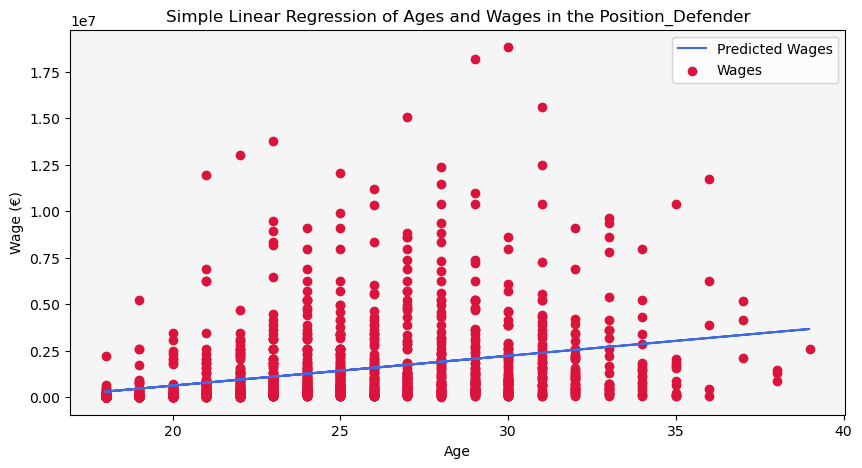

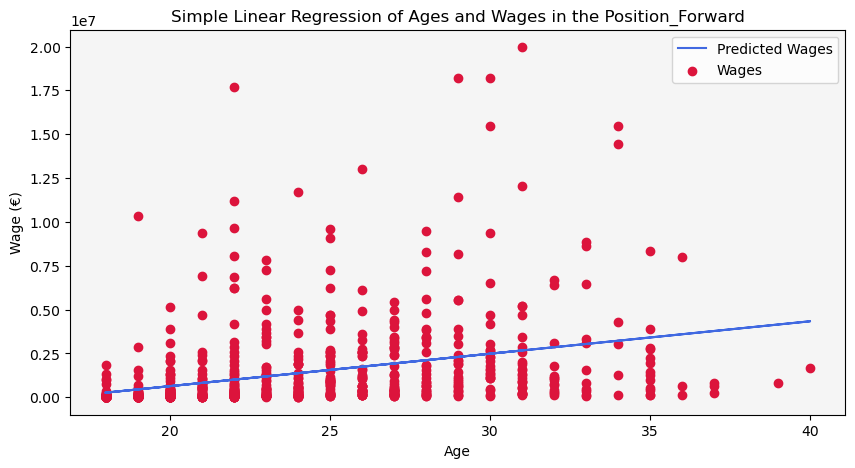

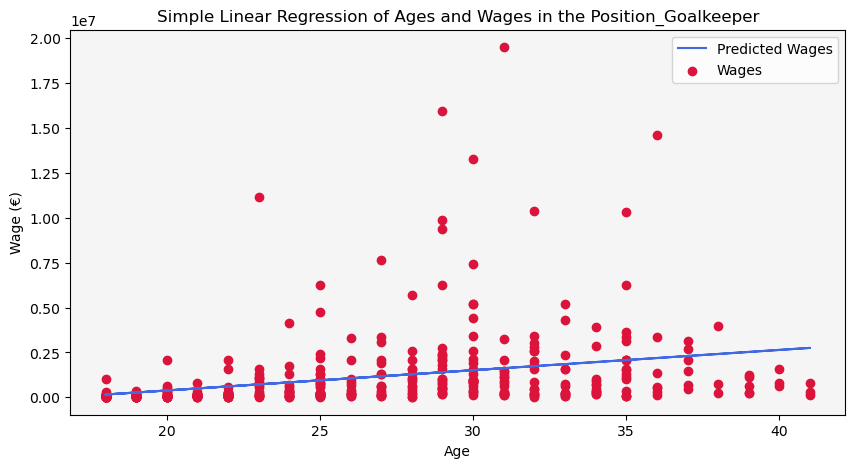

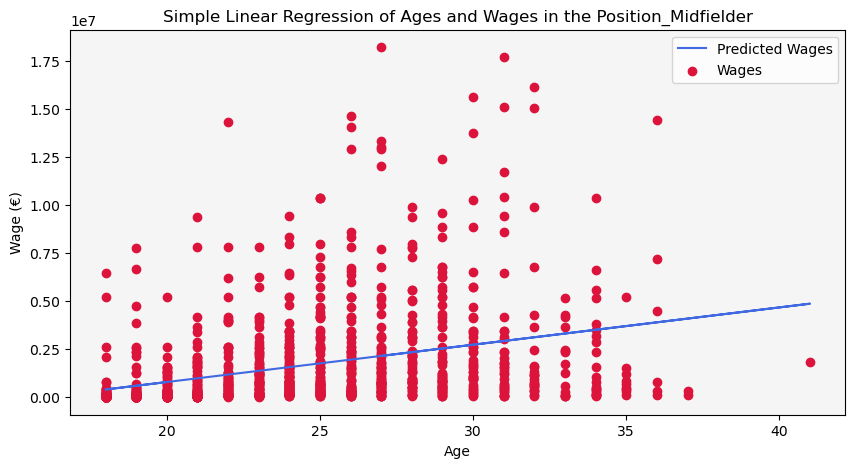

In [1387]:
 # Looping through each of the leagues wages
for position in position_coloumns_numeric:
    position_data = football_salaries_positions_numeric[football_salaries_positions_numeric[position] == 1]
    plt.figure (figsize = (10,5)) #Plotting the figure size
    Age_Numeric = position_data[["Age"]]  
    Wage_Numeric = position_data["Wage"] 
    
    # Making the simple linear regression model
    linear_regression = LinearRegression()
    linear_regression.fit(Age_Numeric, Wage_Numeric)
    
    # Plot actual data points
    plt.plot(Age_Numeric, linear_regression.predict(Age_Numeric), color='royalblue', label="Predicted Wages")
    plt.scatter(Age_Numeric, Wage_Numeric, color='crimson', label="Wages")

    # Customize the plot
    plt.gca().set_facecolor('whitesmoke')
    plt.legend() 
    plt.title(f"Simple Linear Regression of Ages and Wages in the {position}")
    plt.xlabel("Age")
    plt.ylabel("Wage (€)")
    
plt.show()

#### Linear Regression Model: Positions Correlation with Wages in different Experience Levels

In [1453]:
#Making the league numeric, (a boolean), so that it can be graphed.
football_salaries_numeric = pd.get_dummies (football_salaries, columns = ['Position'])

#Makes multiple coloumns for each league in the boolean form of True or False
position_coloumns_numeric = football_salaries_numeric.filter(like='Position', axis=1).columns



#Plotting the size of the visualisation
plt.figure (figsize = (19,30))

# Creating a loop that goes through the numeric league coloumns, starting from 1 
for i, position in enumerate(position_coloumns_numeric, start=1):
    # Filters the data so that it places the correct players in the right league, making so that players that are marked as 1 in the correct league
    position_data = football_salaries_numeric[football_salaries_numeric[position] == 1]
    #Fitting a linear regression model which looks at the experience and wage
   
    #using the organised data now and select the players that apply to the following variables of experience and wage
    experience = position_data[['Apps', 'Caps']] 
    wage = position_data['Wage']  
    linear_model = LinearRegression().fit(experience, wage)

    #using the organised data now and select the players that apply to the following variables of experience and wage
    #Printing the results of the model coeffiecint + rounding the to 1 decimal place
    print(f"\n {position}:")
    print (f"scope: {round (linear_model.coef_.mean(), 1)}")
    print(f"  Intercept: {round (linear_model.intercept_, 1)}") #the intercept
    print(f"  Apps Coefficient: {round (linear_model.coef_[0], 1)}") #Getting the coefficient of apps through slicing 
    print(f"  Caps Coefficient: {round (linear_model.coef_[1], 1)}") #Getting the coefficient of caps through slicing


 Position_Defender:
scope: 25070.3
  Intercept: 391579.2
  Apps Coefficient: 3706.0
  Caps Coefficient: 46434.6

 Position_Forward:
scope: 31267.2
  Intercept: 331192.4
  Apps Coefficient: 3112.3
  Caps Coefficient: 59422.1

 Position_Goalkeeper:
scope: 21165.3
  Intercept: 180495.8
  Apps Coefficient: 3868.4
  Caps Coefficient: 38462.2

 Position_Midfielder:
scope: 32772.9
  Intercept: 436909.6
  Apps Coefficient: 3464.2
  Caps Coefficient: 62081.7


<Figure size 1900x3000 with 0 Axes>

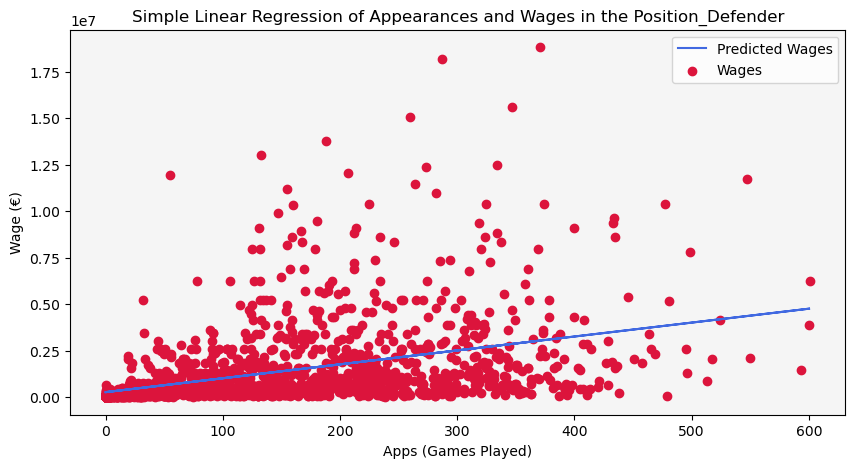

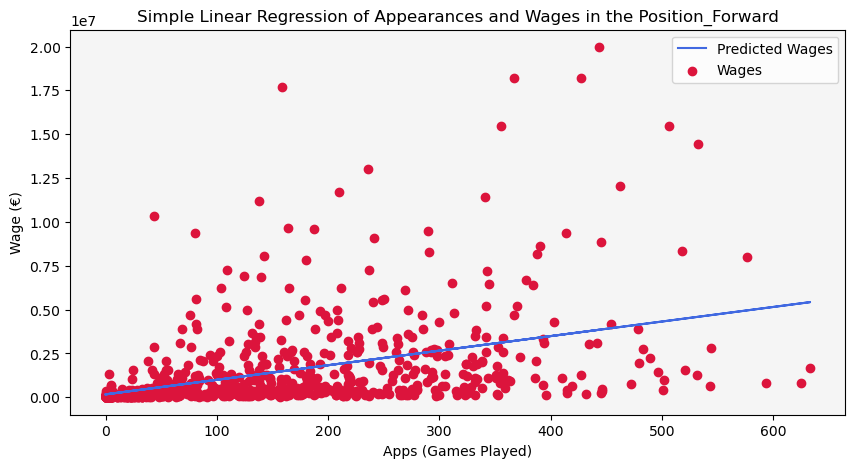

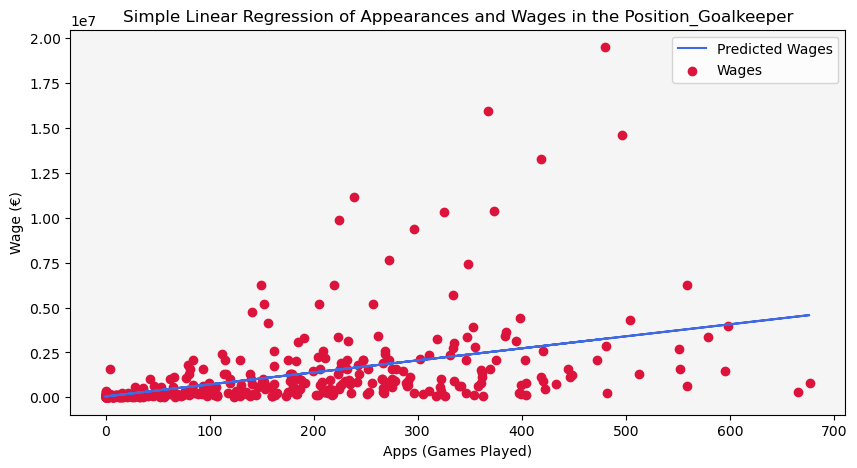

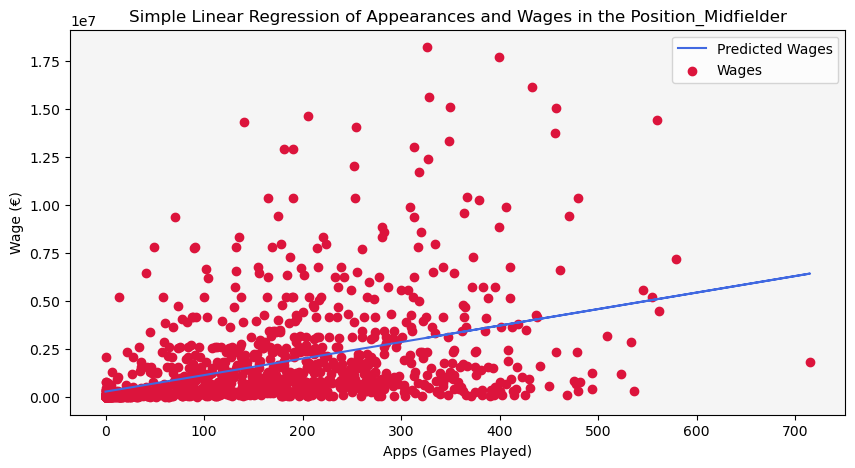

In [1391]:
# Looping through each of the leagues wages
for position in position_coloumns_numeric:
    position_data = football_salaries_numeric[football_salaries_numeric[position] == 1]
    plt.figure (figsize = (10,5)) #Plotting the figure size
    Apps_Numeric = position_data[["Apps"]]  
    Wage_Numeric = position_data["Wage"] 
    
    # Making the simple linear regression model
    linear_regression = LinearRegression()
    linear_regression.fit(Apps_Numeric, Wage_Numeric)
    
    # Plot actual data points
    plt.plot(Apps_Numeric, linear_regression.predict(Apps_Numeric), color='royalblue', label="Predicted Wages")
    plt.scatter(Apps_Numeric, Wage_Numeric, color='crimson', label="Wages")

    
    
    # Customize the plot
    plt.gca().set_facecolor('whitesmoke')
    plt.legend() 
    plt.title(f"Simple Linear Regression of Appearances and Wages in the {position}")
    plt.xlabel("Apps (Games Played)")
    plt.ylabel("Wage (€)")
    
plt.show()

### Logistic Regression

#### Logistic Regression Model: Premier League Appearances influence on Wages

In [1393]:
football_salaries = football_salaries.copy() 
#Making the wage binary so that high (1) is considered wage higher than 2 million euros
def wage_binary(wage):
    if wage < 2000000:  # Less than 500,000 categorises as low
        return 0
    else:  # And anything higher than 1,500,000 is considered high
        return 1

#Focusing on the Premier League
prem_football_salaries = football_salaries [football_salaries['League'] == 'Premier League'].copy()
prem_log_apps = prem_football_salaries [['Apps', 'Caps']]

#Applying the wage binary and creating a column 
prem_football_salaries['wage_binary'] = prem_football_salaries['Wage'].apply(wage_binary) 

wage_binary = prem_football_salaries ["wage_binary"]

#Making the logistic regression
prem_app_logreg = LogisticRegression()
prem_app_logreg.fit(prem_log_apps,wage_binary)

# The prediction model
prem_app_pred = prem_app_logreg.predict(prem_log_apps)

#Printing the results: inlcuding accuracy, classification report, and coefficients
accuracy = accuracy_score(wage_binary, prem_app_pred) 
print("Accuracy: {:.2f}%".format(accuracy * 100)) 

print("\nClassification Report:") 

print(classification_report(wage_binary, prem_app_pred))
print("\nCoefficients:")
print(prem_app_logreg.coef_[0])
    
 

Accuracy: 82.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       480
           1       0.84      0.75      0.79       395

    accuracy                           0.82       875
   macro avg       0.82      0.82      0.82       875
weighted avg       0.82      0.82      0.82       875


Coefficients:
[0.011839   0.05246997]


#### Logistic Regression Model: Premier League Ages influence on Wages

In [1395]:
football_salaries = football_salaries.copy() 

#Making the wage binary so that high (1) is considered wage higher than 2 million euros
def wage_binary(wage):
    if wage < 2000000:  # Less than 500,000 categorises as low
        return 0
    else:  # And anything higher than 1,500,000 is considered high
        return 1

prem_football_salaries = football_salaries [football_salaries['League'] == 'Premier League'].copy()
prem_log_age = prem_football_salaries [['Age']]
prem_football_salaries['Wage_Binary'] = prem_football_salaries['Wage'].apply(wage_binary) 

wage_binary = prem_football_salaries ["Wage_Binary"]

prem_age_logreg = LogisticRegression()
prem_age_logreg.fit(prem_log_age, wage_binary)

# The prediction model
prem_age_pred = prem_age_logreg.predict(prem_log_age)

#Printing the results: inlcuding accuracy, classification report, and coefficients
accuracy = accuracy_score(wage_binary, prem_age_pred) 
print("Accuracy: {:.2f}%".format(accuracy * 100)) 
print("\nClassification Report:") 

print(classification_report(wage_binary, prem_age_pred))
print("\nCoefficients:")
print(prem_age_logreg.coef_[0])
    

Accuracy: 81.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       480
           1       0.83      0.76      0.79       395

    accuracy                           0.82       875
   macro avg       0.82      0.81      0.81       875
weighted avg       0.82      0.82      0.82       875


Coefficients:
[0.37175449]


#### Logistic Regression Model: Midfielders Age on Wages

In [1397]:
football_salaries = football_salaries.copy() 

#Making the wage binary so that high (1) is considered wage higher than 2 million euros
def wage_binary(wage):
    if wage < 2000000:  # Less than 500,000 categorises as low
        return 0
    else:  # And anything higher than 1,500,000 is considered high
        return 1

#Focusing on midfielders
mid_football_salaries = football_salaries [football_salaries['Position'] == 'Midfielder'].copy()
mid_log_age = mid_football_salaries [['Age']]

#Creating a new column, wile apply the wage binary.
mid_football_salaries['Wage_Binary'] = mid_football_salaries['Wage'].apply(wage_binary) 

wage_binary = mid_football_salaries ["Wage_Binary"]

#Applying the logistic regression
mid_age_logreg = LogisticRegression()
mid_age_logreg.fit(mid_log_age, wage_binary)

# The prediction model
mid_age_pred = mid_age_logreg.predict(mid_log_age)

#Printing the results: inlcuding accuracy, classification report, and coefficients
accuracy = accuracy_score(wage_binary, mid_age_pred) 
print("Accuracy: {:.2f}%".format(accuracy * 100)) 
print("\nClassification Report:") 

print(classification_report(wage_binary, mid_age_pred))
print("\nCoefficients:")
print(mid_age_logreg.coef_[0])

Accuracy: 74.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       880
           1       0.36      0.07      0.12       279

    accuracy                           0.75      1159
   macro avg       0.56      0.52      0.49      1159
weighted avg       0.67      0.75      0.68      1159


Coefficients:
[0.15599131]


#### Logistic Regression Model: Midfielders Experience Levels on Wages

In [1399]:
football_salaries = football_salaries.copy() 

#Making the wage binary so that high (1) is considered wage higher than 2 million euros
def wage_binary(wage):
    if wage < 2000000:  # Less than 500,000 categorises as low
        return 0
    else:  # And anything higher than 1,500,000 is considered high
        return 1

#Focusing on the midfielders
mid_football_salaries = football_salaries [football_salaries['Position'] == 'Midfielder'].copy()
mid_log_app = mid_football_salaries [['Apps', 'Caps']]
mid_football_salaries['Wage_Binary'] = mid_football_salaries['Wage'].apply(wage_binary) 
#Creating a new column, wile apply the wage binary.
wage_binary = mid_football_salaries ["Wage_Binary"]

mid_app_logreg = LogisticRegression()
mid_app_logreg.fit(mid_log_app, wage_binary)

# The prediction model
mid_app_pred = mid_app_logreg.predict(mid_log_app)

#Printing the results: inlcuding accuracy, classification report, and coefficients
accuracy = accuracy_score(wage_binary, mid_app_pred) 
print("Accuracy: {:.2f}%".format(accuracy * 100)) 
print("\nClassification Report:") 

print(classification_report(wage_binary, mid_app_pred))
print("\nCoefficients:")
print(mid_age_logreg.coef_[0])

Accuracy: 81.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       880
           1       0.74      0.39      0.51       279

    accuracy                           0.82      1159
   macro avg       0.79      0.67      0.70      1159
weighted avg       0.81      0.82      0.80      1159


Coefficients:
[0.15599131]
